## Breast Cancer Wisconsin (Diagnostic) Data Set
#### Predict whether the cancer is benign or malignant

##### About this Dataset
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
And the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

##### Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

## Data Analysis/ EDA

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv("data.csv", delimiter=',')
df.drop(['Unnamed: 32'], axis = 1, inplace = True)  #unnecessary column
df.head(10)   # Showing first 10 rows

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
0    842302         M        17.99         10.38          122.80   1,001.00             0.12              0.28            0.30                 0.15           0.24                    0.08       1.09        0.91          8.59   153.40           0.01            0.05          0.05               0.02         0.03                  0.01         25.38          17.33           184.60    2,019.00              0.16               0.67             0.71                  0.27            0.46                     0.12
1    842517         M        20.57         17.77          132.90   1,326.00             0.08              0.08            0.09                 0.07           0.18                    0.06       0.54        0.73          3.40    74.08           0.01            0.01          0.02               0.01         0.01                  0.00         24.99          23.41           158.80    1,956.00              0.12               0.19             0.24                  0.19            0.28                     0.09
2  84300903         M        19.69         21.25          130.00   1,203.00             0.11              0.16            0.20                 0.13           0.21                    0.06       0.75        0.79          4.58    94.03           0.01            0.04          0.04               0.02         0.02                  0.00         23.57          25.53           152.50    1,709.00              0.14               0.42             0.45                  0.24            0.36                     0.09
3  84348301         M        11.42         20.38           77.58     386.10             0.14              0.28            0.24                 0.11           0.26                    0.10       0.50        1.16          3.44    27.23           0.01            0.07          0.06               0.02         0.06                  0.01         14.91          26.50            98.87      567.70              0.21               0.87             0.69                  0.26            0.66                     0.17
4  84358402         M        20.29         14.34          135.10   1,297.00             0.10              0.13            0.20                 0.10           0.18                    0.06       0.76        0.78          5.44    94.44           0.01            0.02          0.06               0.02         0.02                  0.01         22.54          16.67           152.20    1,575.00              0.14               0.20             0.40                  0.16            0.24                     0.08
5    843786         M        12.45         15.70           82.57     477.10             0.13              0.17            0.16                 0.08           0.21                    0.08       0.33        0.89          2.22    27.19           0.01            0.03          0.04               0.01         0.02                  0.01         15.47          23.75           103.40      741.60              0.18               0.52             0.54                  0.17            0.40                     0.12
6    844359         M        18.25         19.98          119.60   1,040.00             0.09              0.11            0.11                 0.07           0.18                    0.06       0.45        0.77          3.18    53.91           0.00            0.01          0.02               0.01         0.01                  0.00         22.88          27.66           153.20    1,606.00              0.14               0.26             0.38                 

In [4]:
df.info()   # Give information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
df.describe().T

count          mean            std      min        25%        50%          75%            max
id                      569.00 30,371,831.43 125,020,585.61 8,670.00 869,218.00 906,024.00 8,813,129.00 911,320,502.00
radius_mean             569.00         14.13           3.52     6.98      11.70      13.37        15.78          28.11
texture_mean            569.00         19.29           4.30     9.71      16.17      18.84        21.80          39.28
perimeter_mean          569.00         91.97          24.30    43.79      75.17      86.24       104.10         188.50
area_mean               569.00        654.89         351.91   143.50     420.30     551.10       782.70       2,501.00
smoothness_mean         569.00          0.10           0.01     0.05       0.09       0.10         0.11           0.16
compactness_mean        569.00          0.10           0.05     0.02       0.06       0.09         0.13           0.35
concavity_mean          569.00          0.09           0.08     0.00       0.03       0.06         0.13           0.43
concave points_mean     569.00          0.05           0.04     0.00       0.02       0.03         0.07           0.20
symmetry_mean           569.00          0.18           0.03     0.11       0.16       0.18         0.20           0.30
fractal_dimension_mean  569.00          0.06           0.01     0.05       0.06       0.06         0.07           0.10
radius_se               569.00          0.41           0.28     0.11       0.23       0.32         0.48           2.87
texture_se              569.00          1.22           0.55     0.36       0.83       1.11         1.47           4.88
perimeter_se            569.00          2.87           2.02     0.76       1.61       2.29         3.36          21.98
area_se                 569.00         40.34          45.49     6.80      17.85      24.53        45.19         542.20
smoothness_se           569.00          0.01           0.00     0.00       0.01       0.01         0.01           0.03
compactness_se          569.00          0.03           0.02     0.00       0.01       0.02         0.03           0.14
concavity_se            569.00          0.03           0.03     0.00       0.02       0.03         0.04           0.40
concave points_se       569.00          0.01           0.01     0.00       0.01       0.01         0.01           0.05
symmetry_se             569.00          0.02           0.01     0.01       0.02       0.02         0.02           0.08
fractal_dimension_se    569.00          0.00           0.00     0.00       0.00       0.00         0.00           0.03
radius_worst            569.00         16.27           4.83     7.93      13.01      14.97        18.79          36.04
texture_worst           569.00         25.68           6.15    12.02      21.08      25.41        29.72          49.54
perimeter_worst         569.00        107.26          33.60    50.41      84.11      97.66       125.40         251.20
area_worst              569.00        880.58         569.36   185.20     515.30     686.50     1,084.00       4,254.00
smoothness_worst        569.00          0.13           0.02     0.07       0.12       0.13         0.15           0.22
compactness_worst       569.00          0.25           0.16     0.03       0.15       0.21         0.34           1.06
concavity_worst         569.00          0.27           0.21     0.00       0.11       0.23         0.38           1.25
concave points_worst    569.00          0.11           0.07     0.00       0.06       0.10         0.16           0.29
symmetry_worst          569.00          0.29           0.06     0.16       0.25       0.28         0.32           0.66
fractal_dimension_worst 569.00          0.08           0.02     0.06       0.07       0.08         0.09           0.21

In [6]:
df.corr()

id  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
id                       1.00         0.07          0.10            0.07       0.10            -0.01              0.00            0.05                 0.04          -0.02                   -0.05       0.14       -0.01          0.14     0.18           0.10            0.03          0.06               0.08        -0.02                  0.03          0.08           0.06             0.08        0.11              0.01              -0.00             0.02                  0.04           -0.04                    -0.03
radius_mean              0.07         1.00          0.32            1.00       0.99             0.17              0.51            0.68                 0.82           0.15                   -0.31       0.68       -0.10          0.67     0.74          -0.22            0.21          0.19               0.38        -0.10                 -0.04          0.97           0.30             0.97        0.94              0.12               0.41             0.53                  0.74            0.16                     0.01
texture_mean             0.10         0.32          1.00            0.33       0.32            -0.02              0.24            0.30                 0.29           0.07                   -0.08       0.28        0.39          0.28     0.26           0.01            0.19          0.14               0.16         0.01                  0.05          0.35           0.91             0.36        0.34              0.08               0.28             0.30                  0.30            0.11                     0.12
perimeter_mean           0.07         1.00          0.33            1.00       0.99             0.21              0.56            0.72                 0.85           0.18                   -0.26       0.69       -0.09          0.69     0.74          -0.20            0.25          0.23               0.41        -0.08                 -0.01          0.97           0.30             0.97        0.94              0.15               0.46             0.56                  0.77            0.19                     0.05
area_mean                0.10         0.99          0.32            0.99       1.00             0.18              0.50            0.69                 0.82           0.15                   -0.28       0.73       -0.07          0.73     0.80          -0.17            0.21          0.21               0.37        -0.07                 -0.02          0.96           0.29             0.96        0.96              0.12               0.39             0.51                  0.72            0.14                     0.00
smoothness_mean         -0.01         0.17         -0.02            0.21       0.18             1.00              0.66            0.52                 0.55           0.56                    0.58       0.30        0.07          0.30     0.25           0.33            0.32          0.25               0.38         0.20                  0.28          0.21           0.04             0.24        0.21              0.81               0.47             0.43                  0.50            0.39                     0.50
compactness_mean         0.00         0.51          0.24            0.56       0.50             0.66              1.00            0.88                 0.83           0.60                    0.57       0.50        0.05          0.55     0.46           0.14            0.74          0.57               0.64         0.23                  0.51          0.54           0.25             0.59        0.51              0.57       

Number of Benign:  357
Number of Malignant :  212


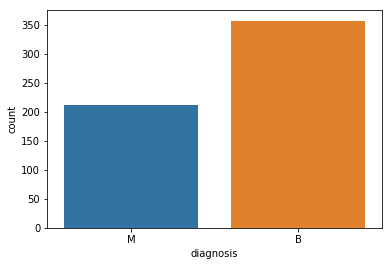

In [7]:
ax = sns.countplot(df.diagnosis,label="Count") 
B, M = df.diagnosis.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

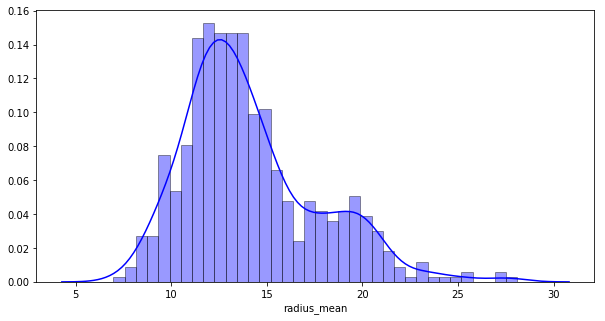

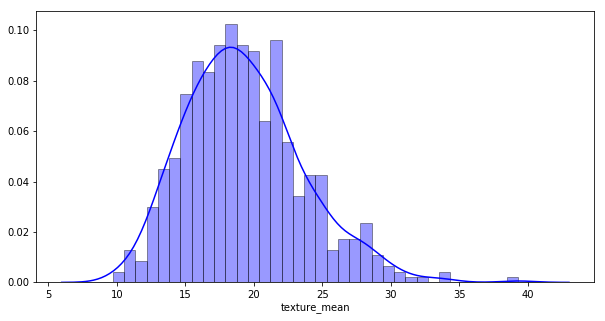

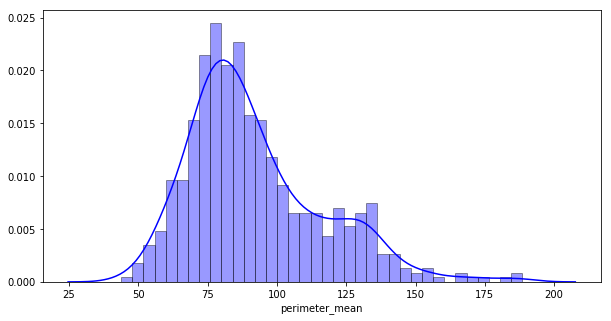

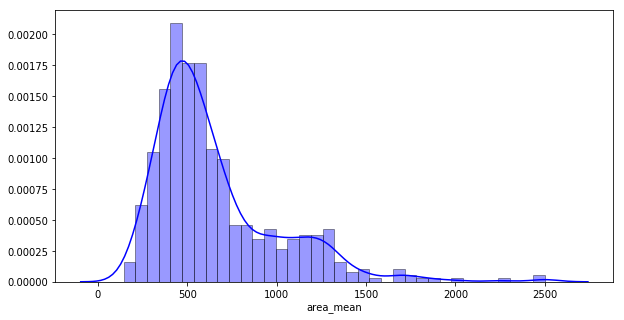

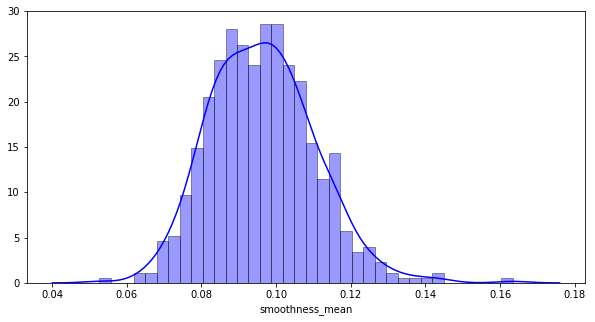

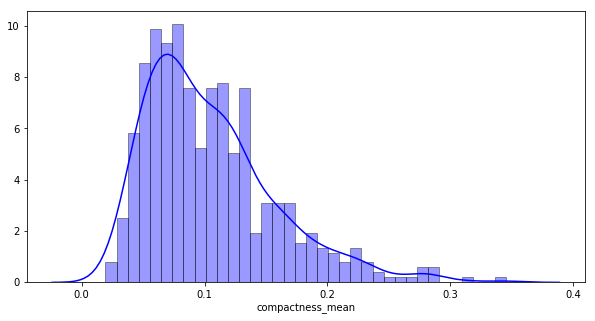

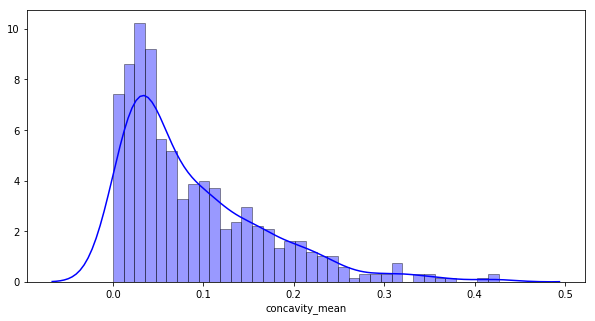

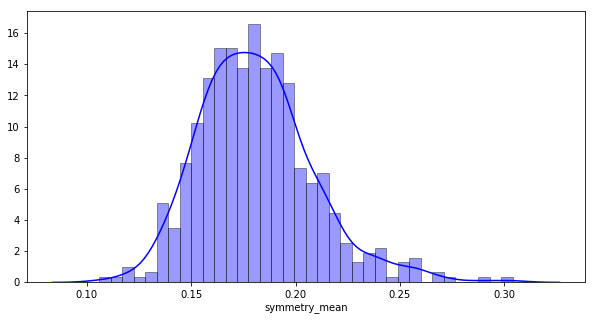

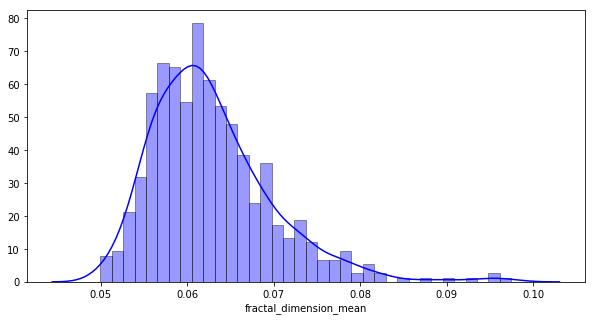

In [8]:
mean_features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", 
                 "symmetry_mean", "fractal_dimension_mean"]

for column in mean_features:
    plt.figure(figsize = (10,5))
    feature = df[column]
    sns.distplot(feature, hist=True, kde=True, 
                    bins=int(180/5), color = 'blue',
                     hist_kws={'edgecolor':'black'})

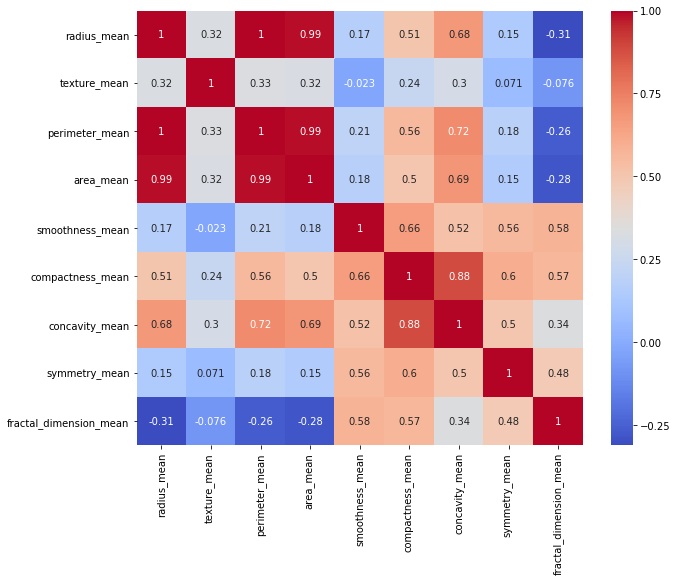

In [9]:
plt.subplots(figsize=(10,8))
sns.heatmap(df[mean_features].corr(),cmap='coolwarm',annot=True);

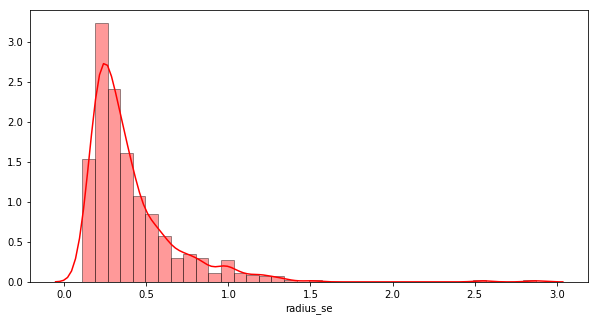

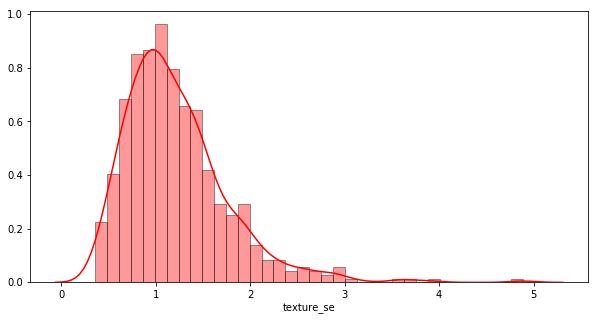

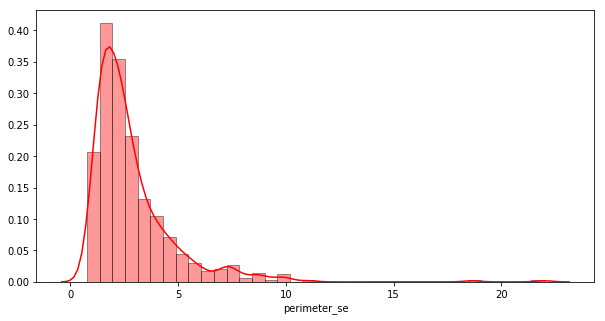

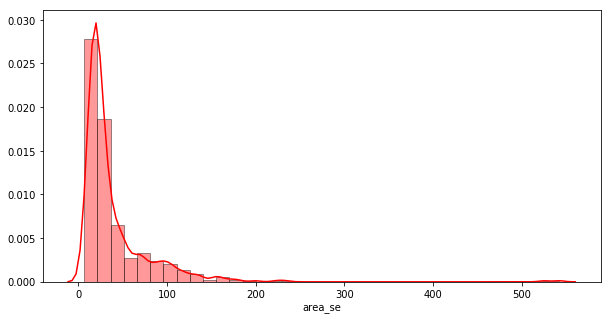

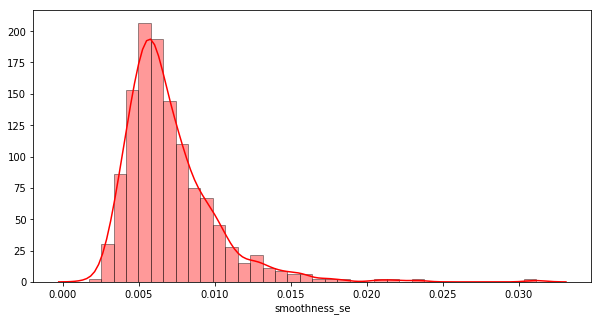

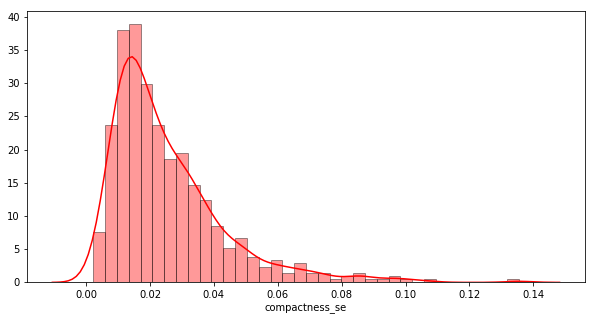

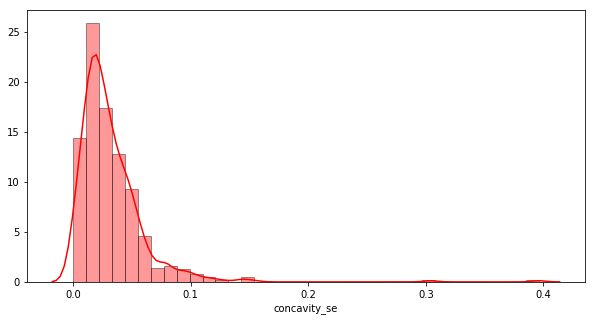

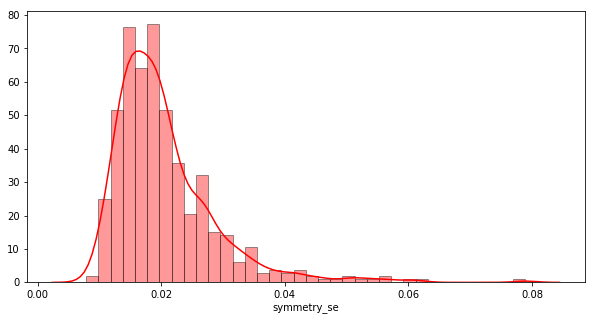

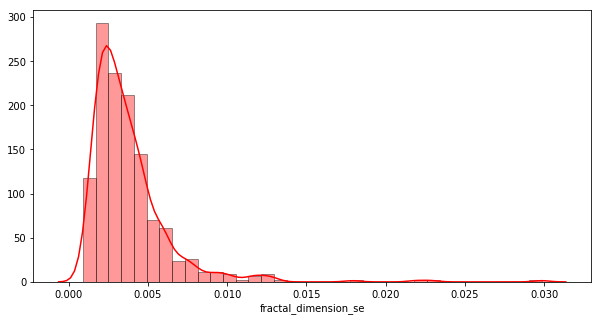

In [10]:
se_features = ["radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", 
                 "symmetry_se", "fractal_dimension_se"]

for column in se_features:
    plt.figure(figsize = (10,5))
    feature = df[column]
    sns.distplot(feature, hist=True, kde=True, 
                    bins=int(180/5), color = 'red',
                     hist_kws={'edgecolor':'black'})

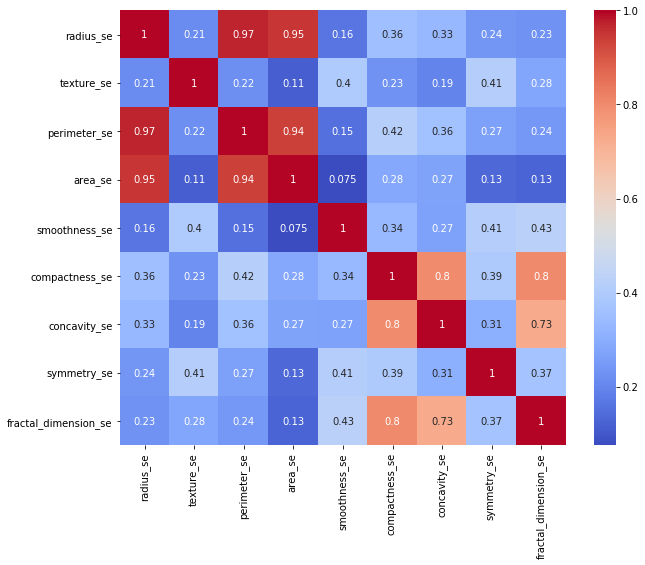

In [11]:
plt.subplots(figsize=(10,8))
sns.heatmap(df[se_features].corr(),cmap='coolwarm',annot=True);

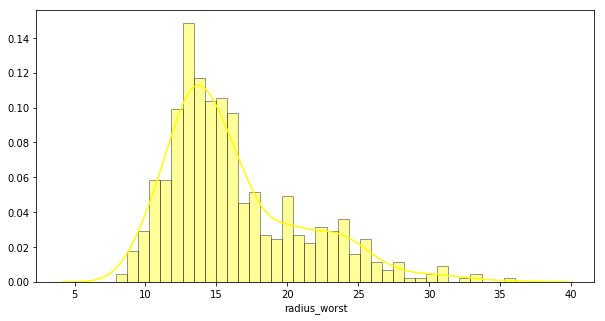

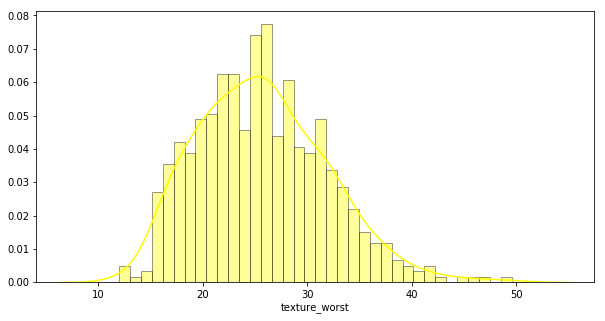

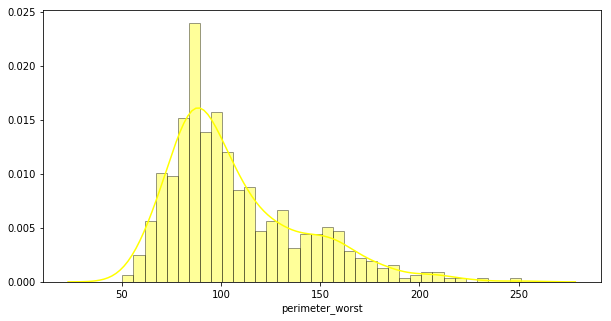

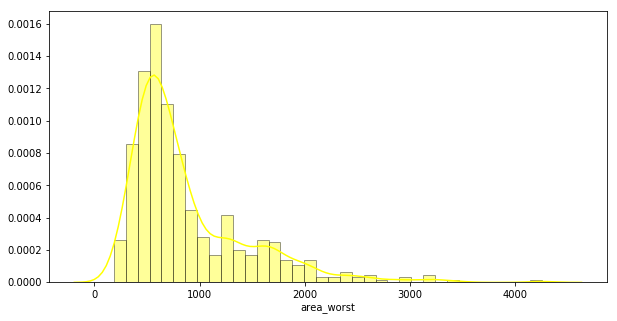

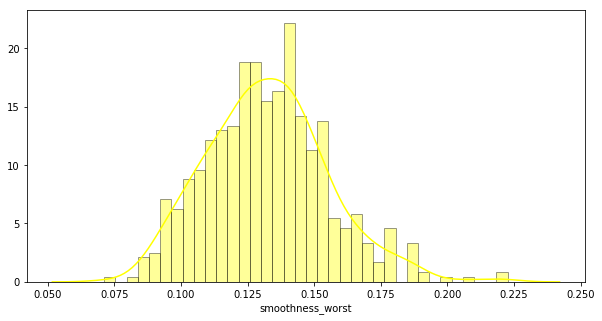

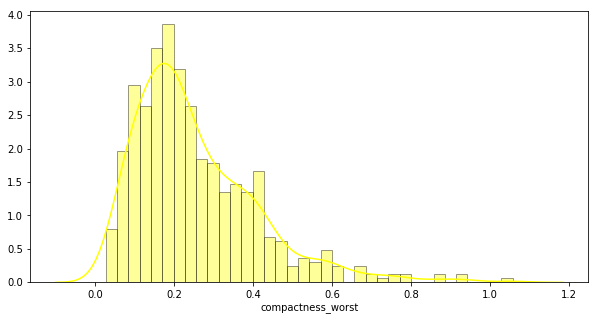

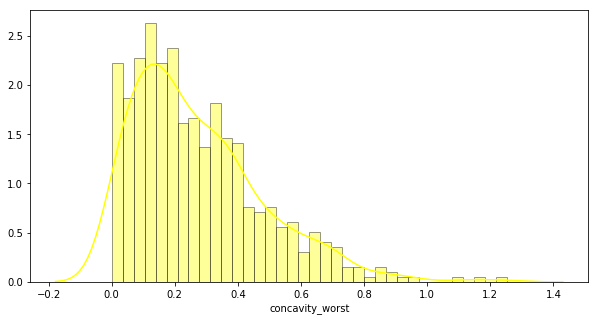

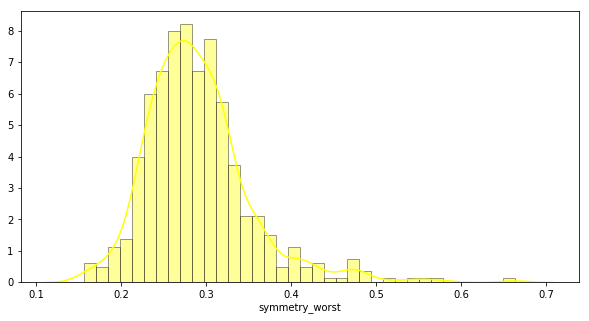

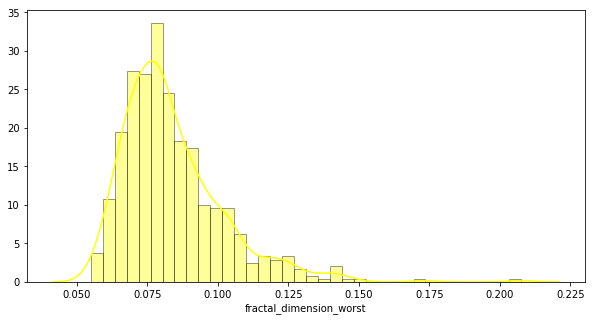

In [12]:
worst_features = ["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", 
                 "symmetry_worst", "fractal_dimension_worst"]

for column in worst_features:
    plt.figure(figsize = (10,5))
    feature = df[column]
    sns.distplot(feature, hist=True, kde=True, 
                    bins=int(180/5), color = 'yellow',
                     hist_kws={'edgecolor':'black'});

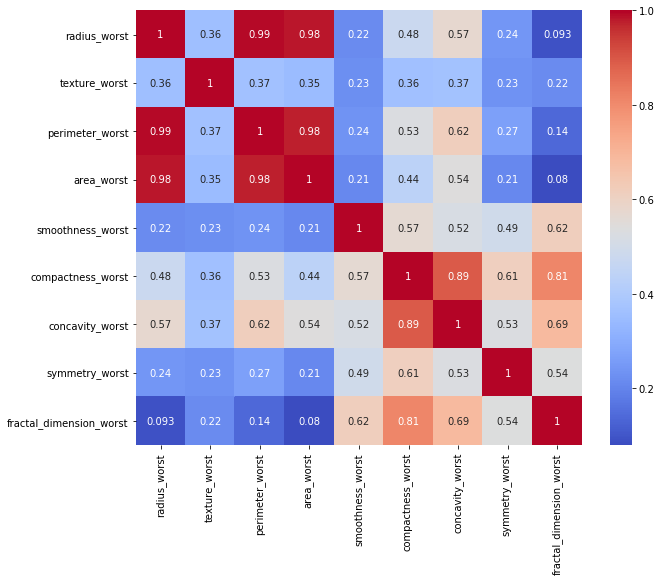

In [13]:
plt.subplots(figsize=(10,8))
sns.heatmap(df[worst_features].corr(),cmap='coolwarm',annot=True);

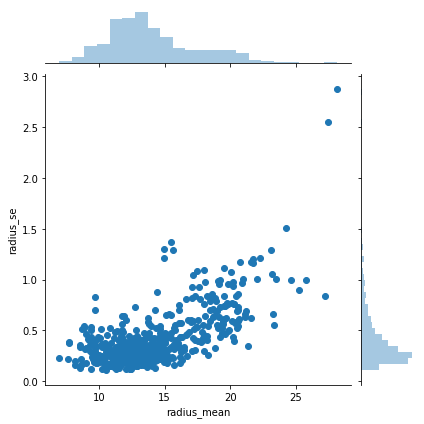

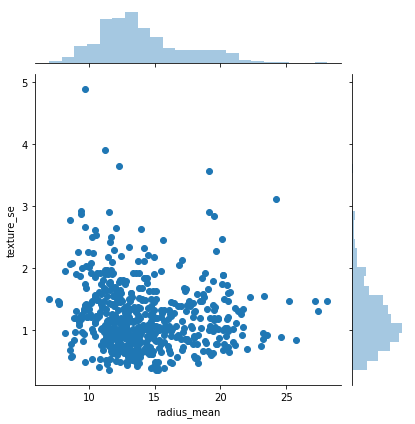

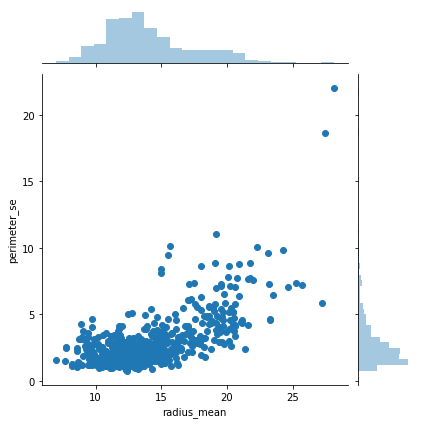

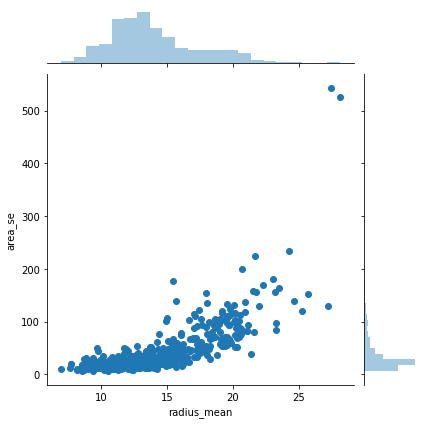

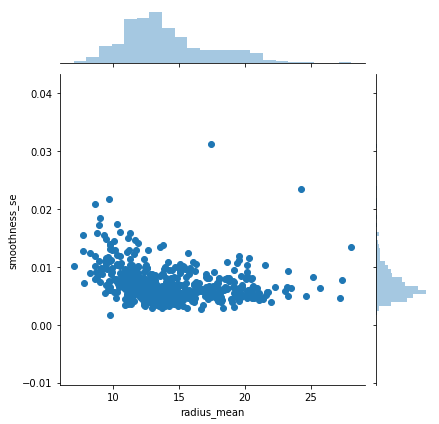

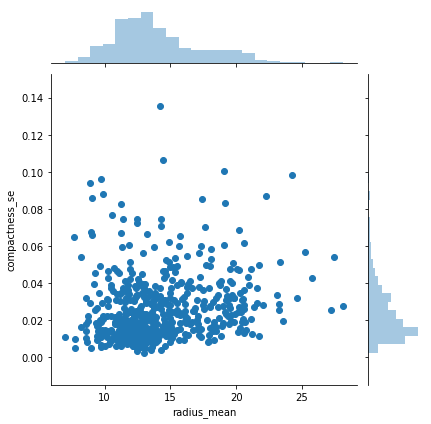

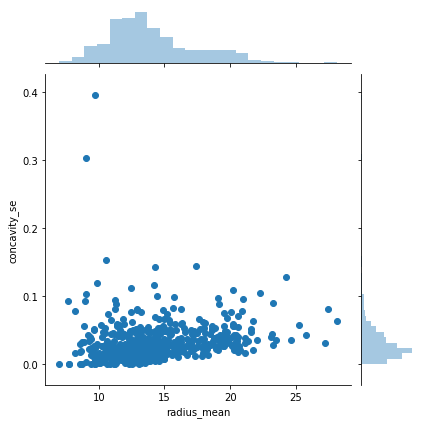

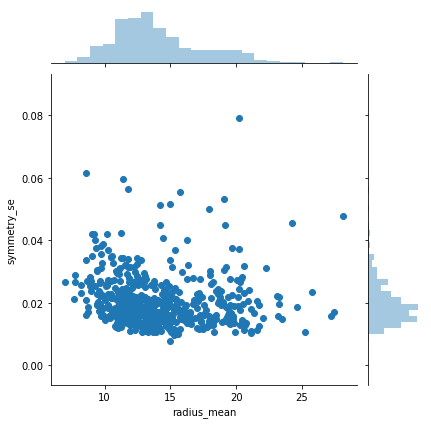

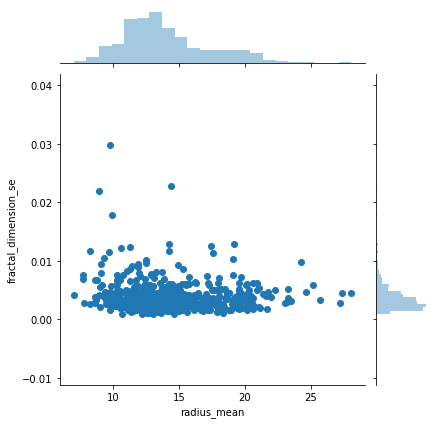

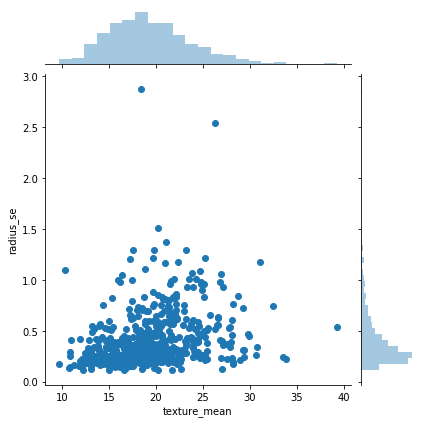

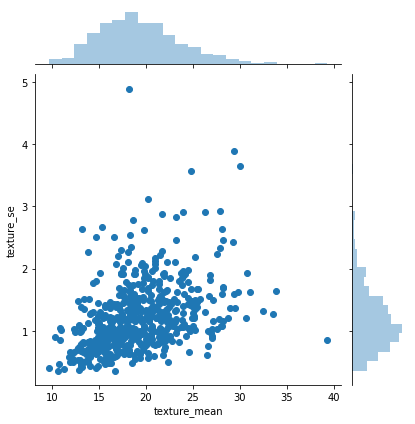

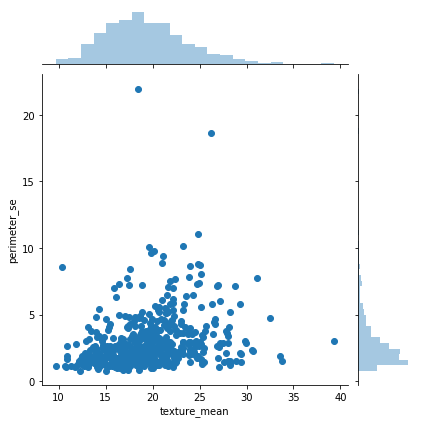

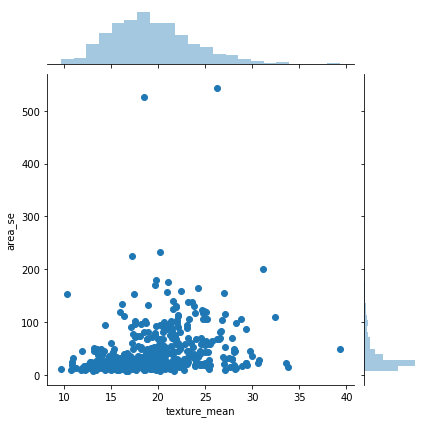

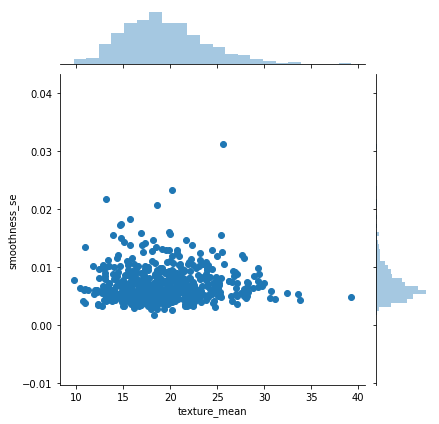

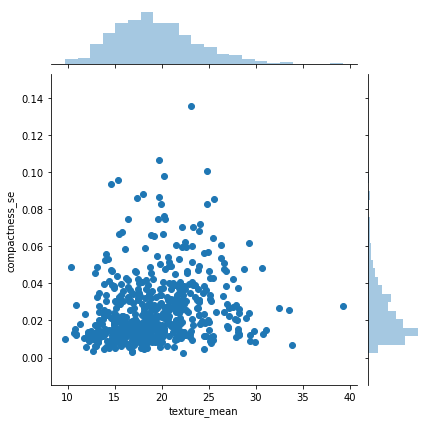

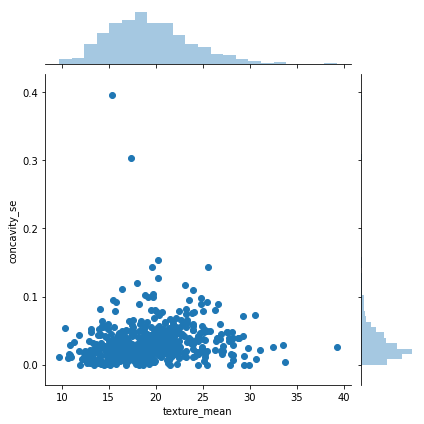

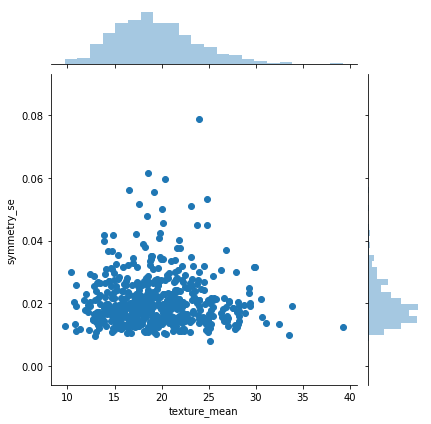

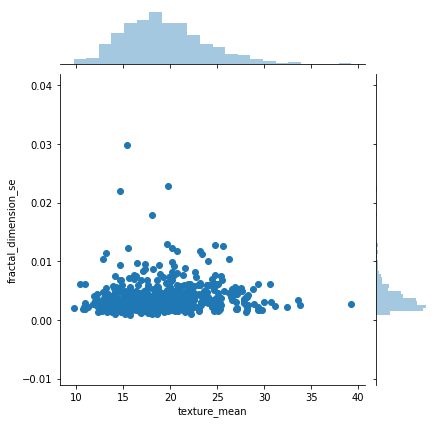

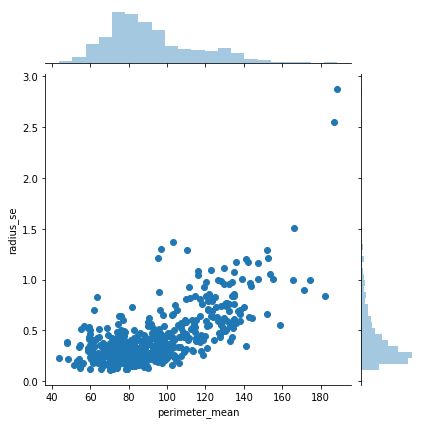

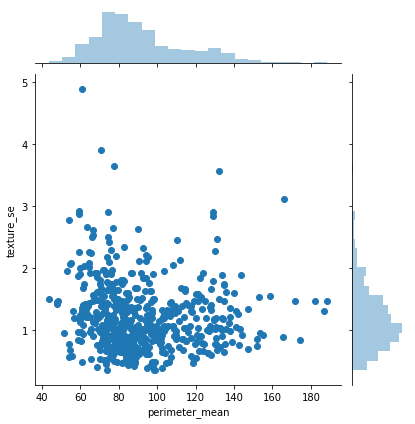

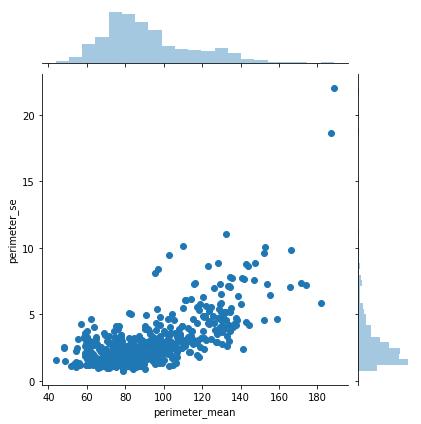

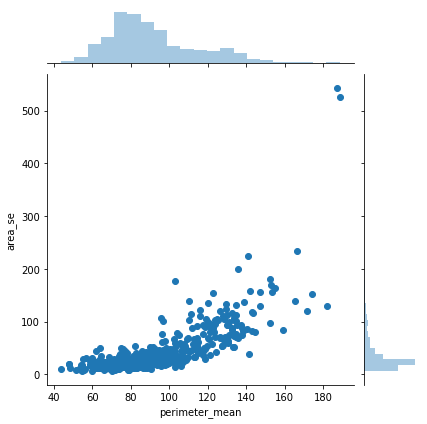

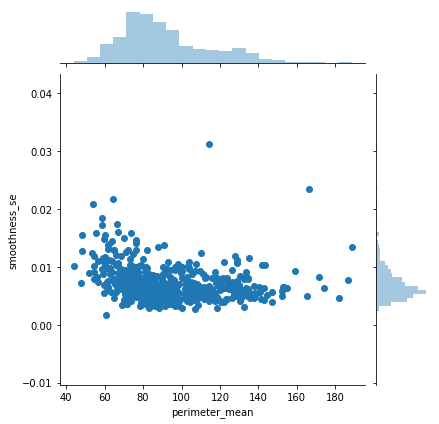

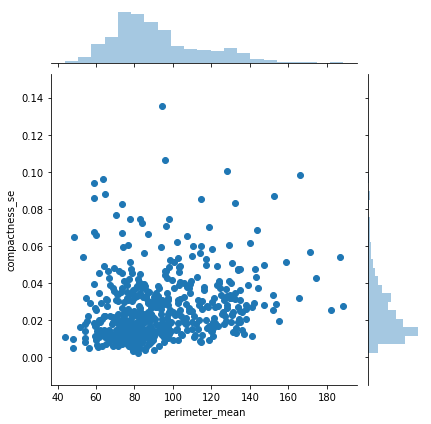

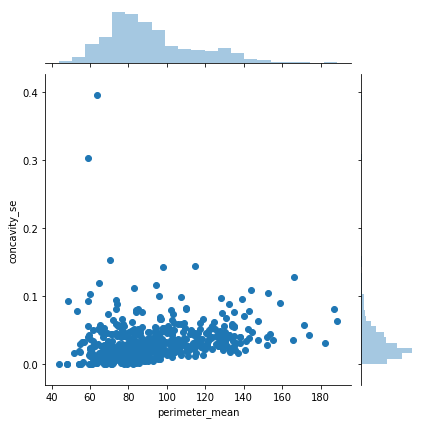

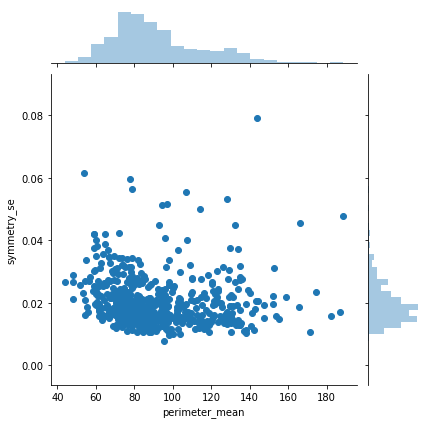

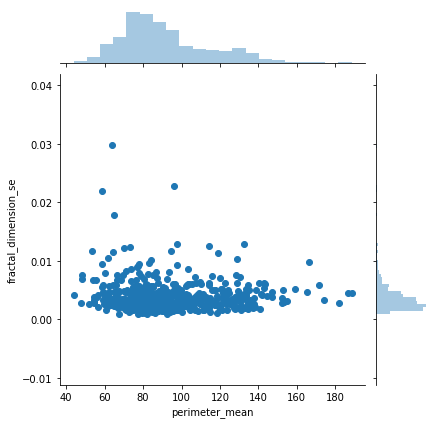

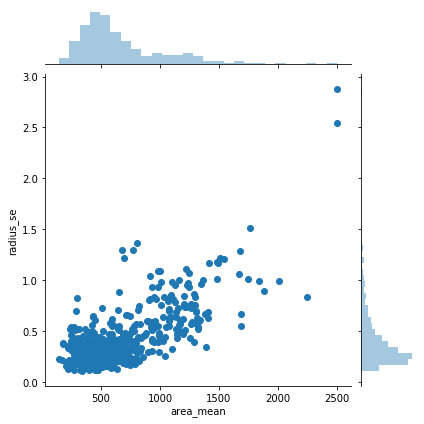

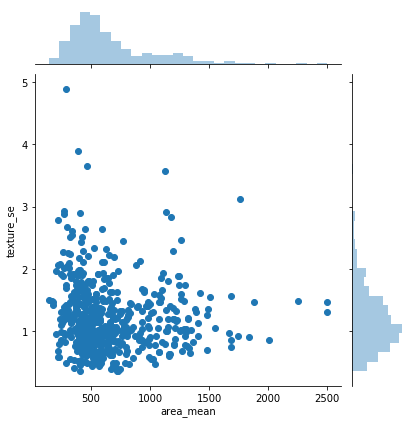

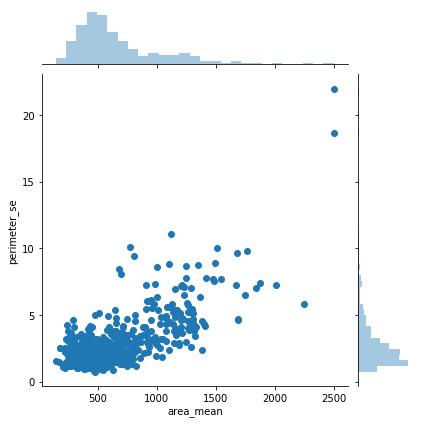

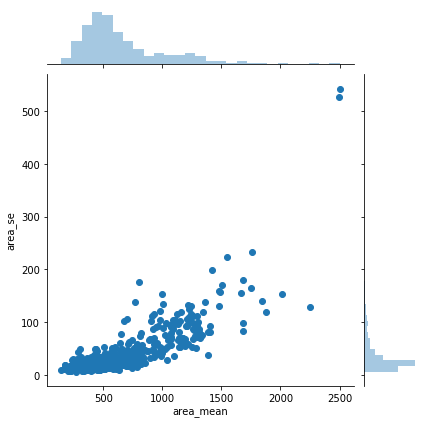

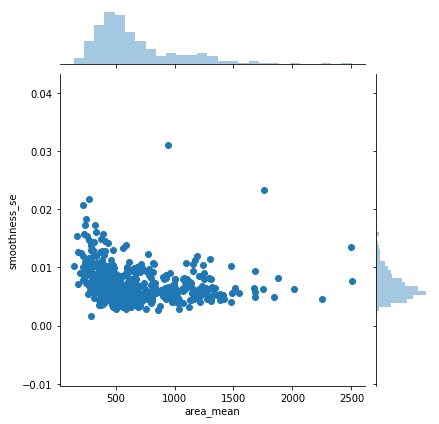

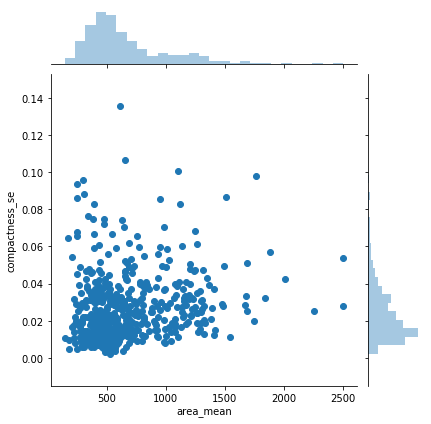

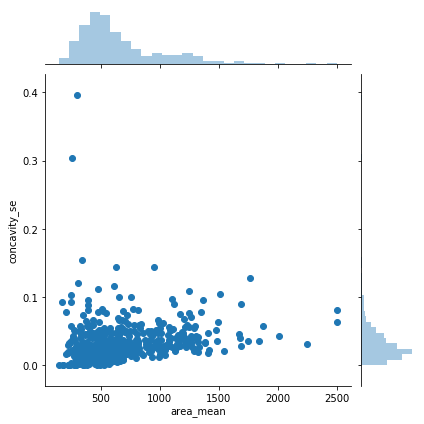

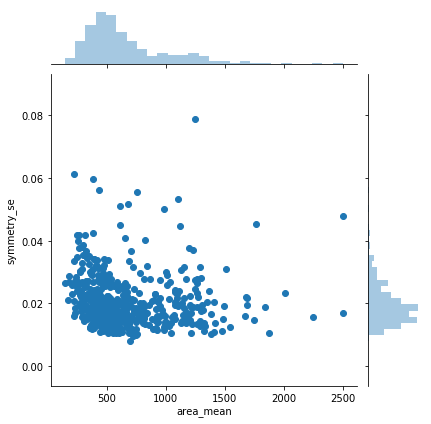

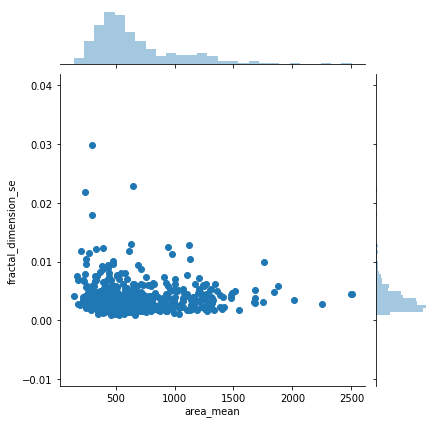

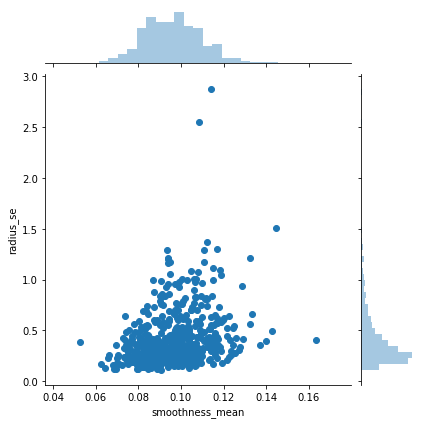

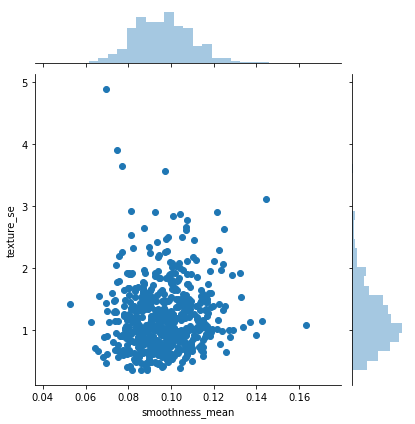

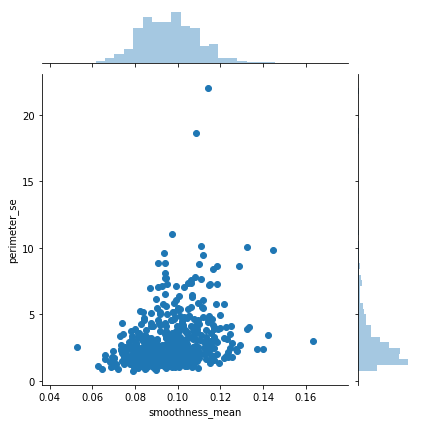

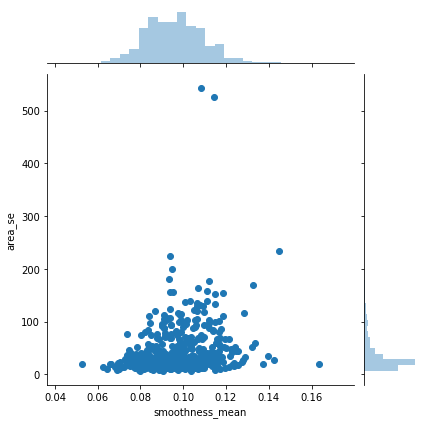

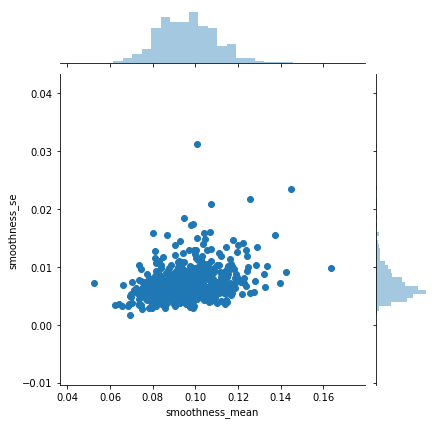

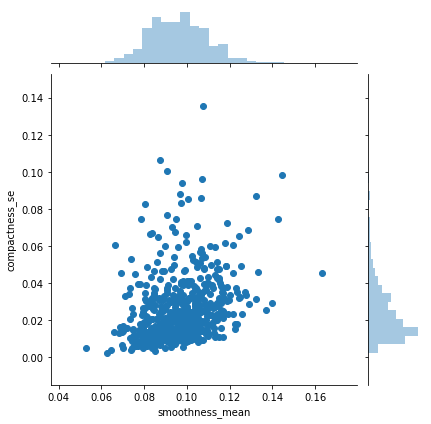

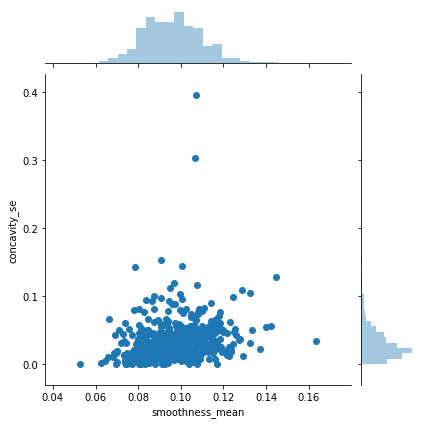

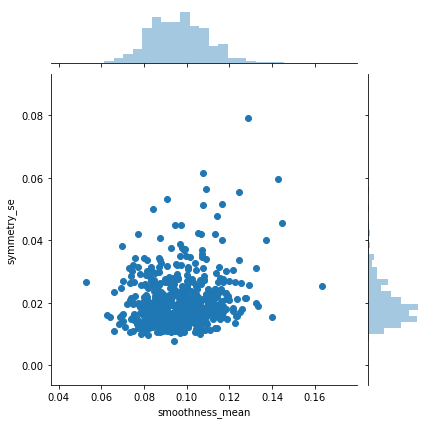

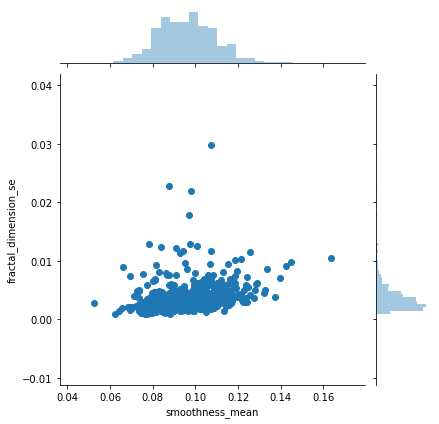

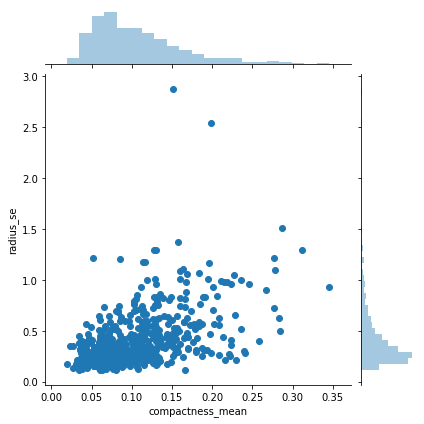

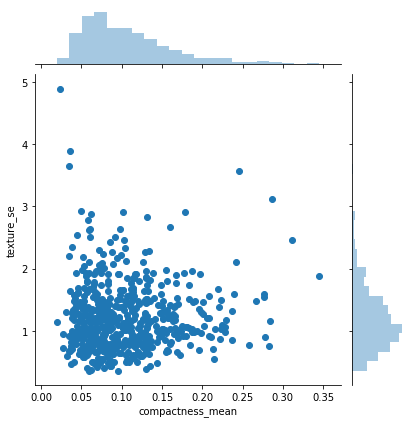

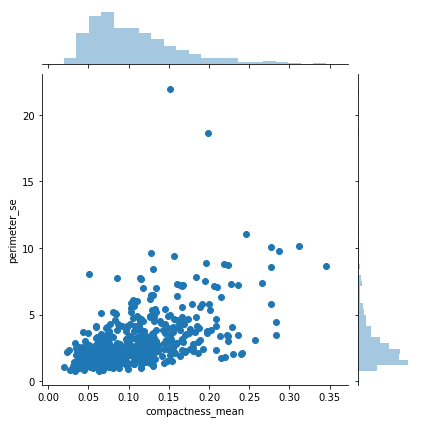

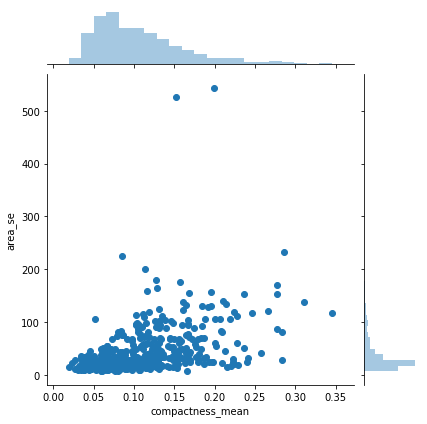

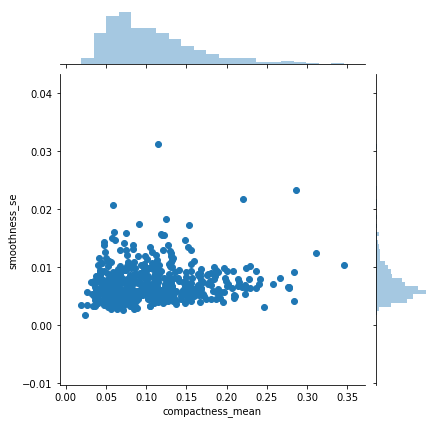

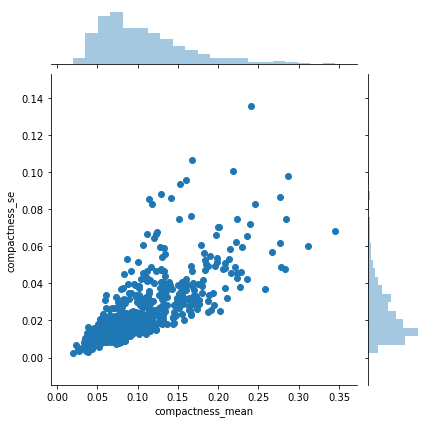

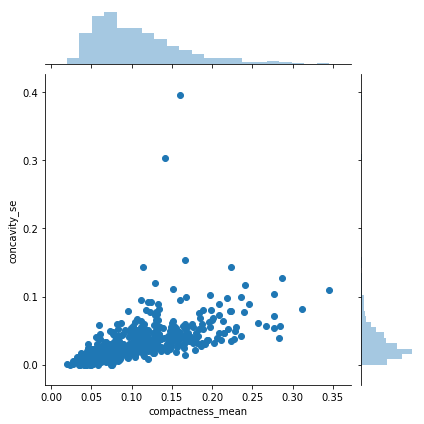

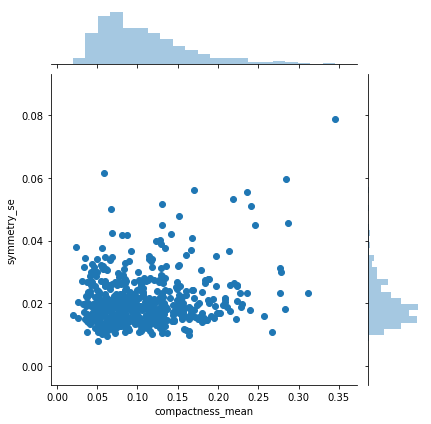

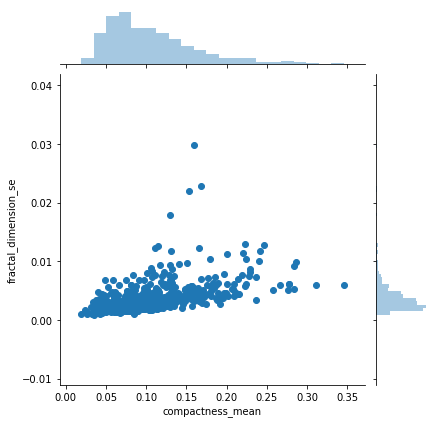

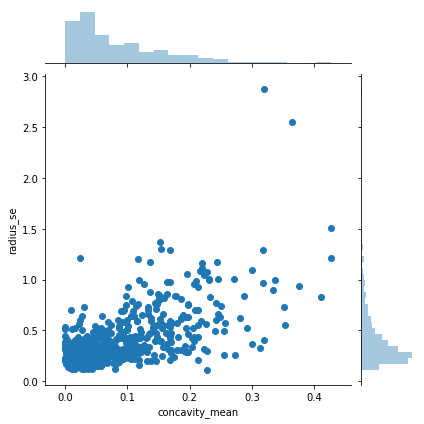

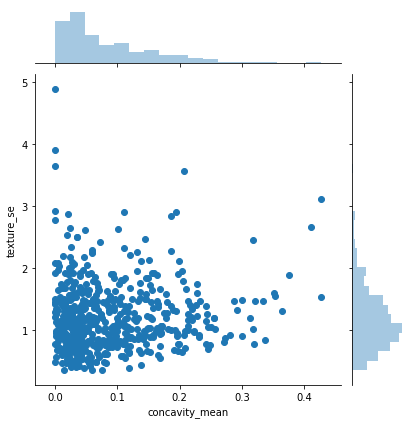

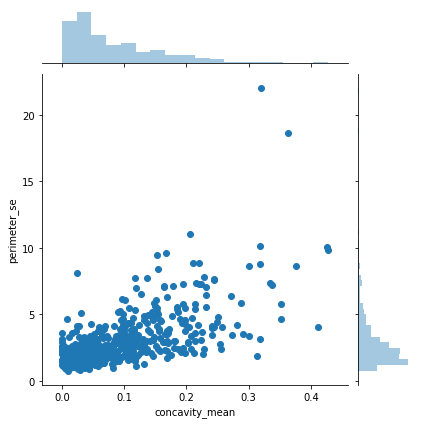

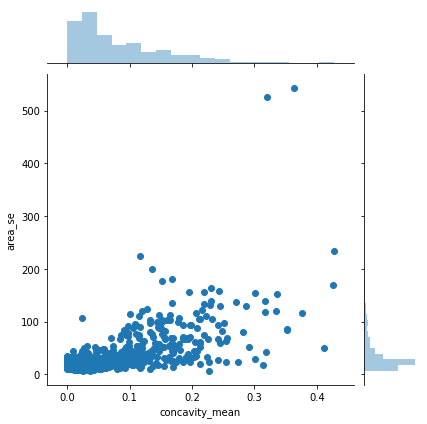

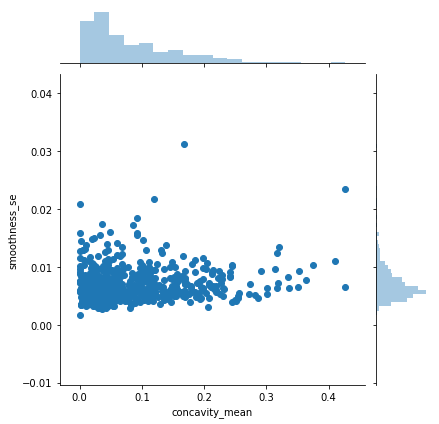

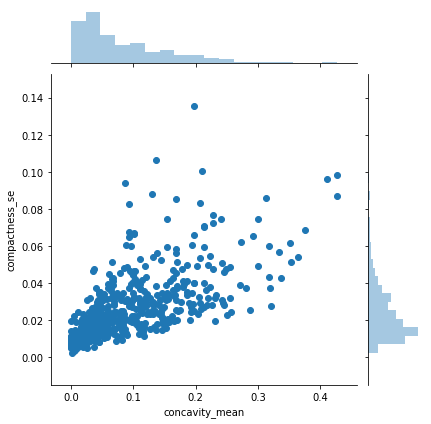

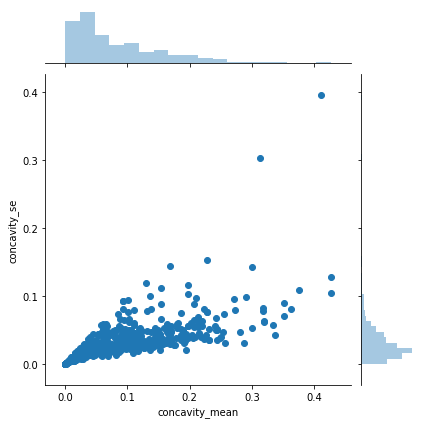

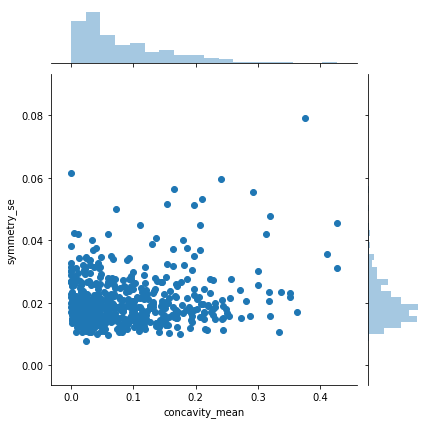

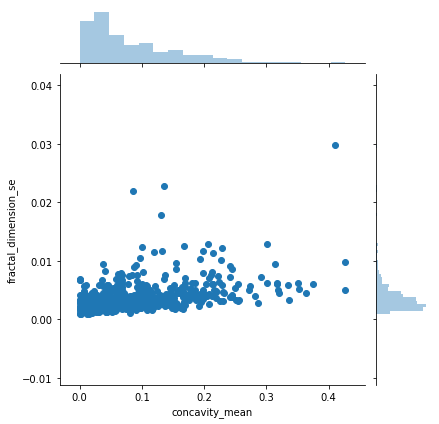

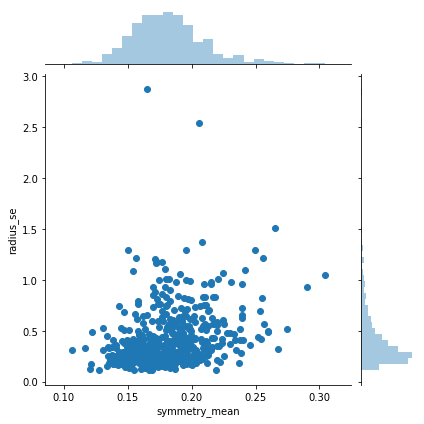

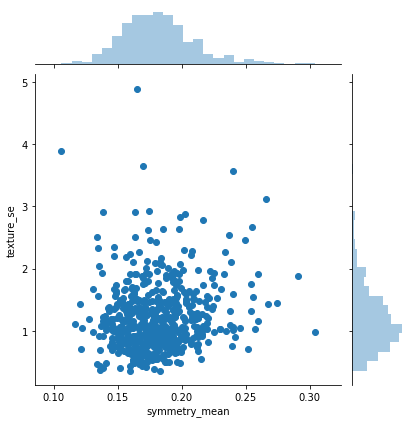

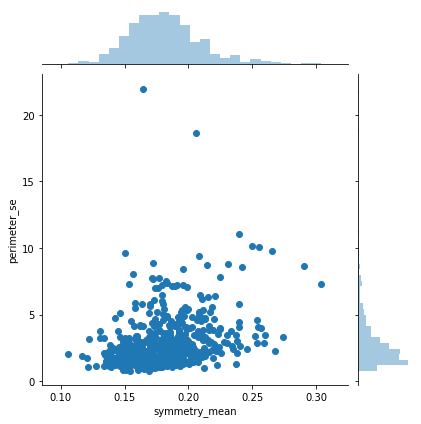

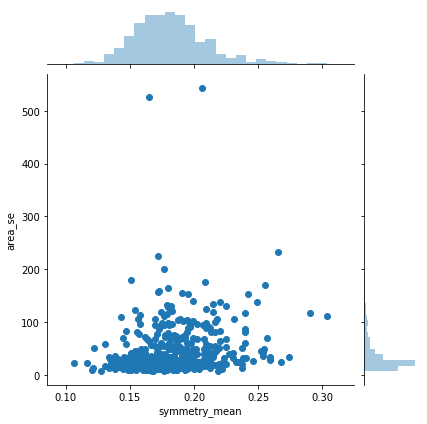

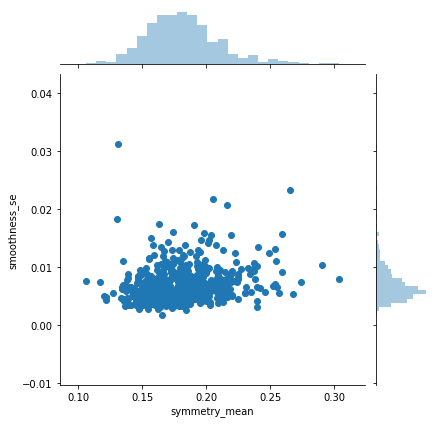

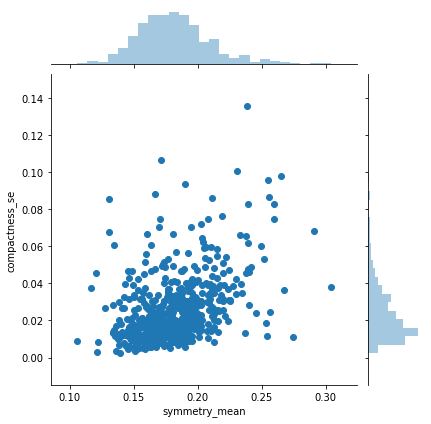

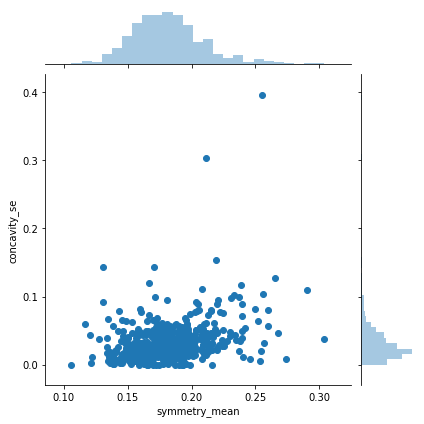

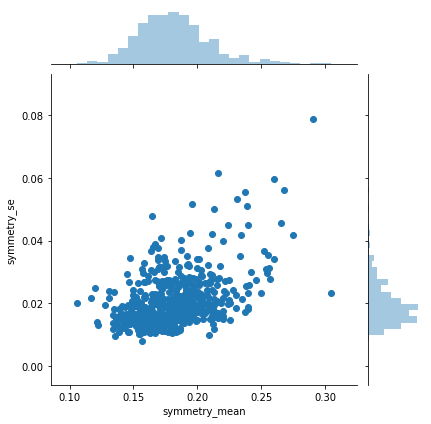

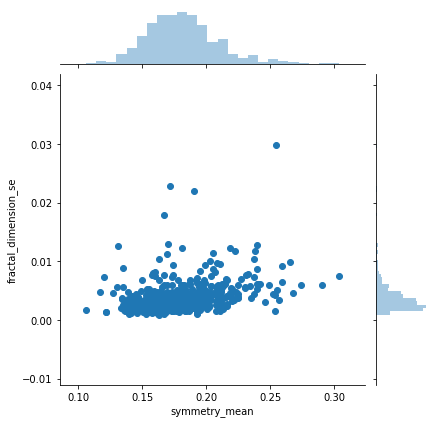

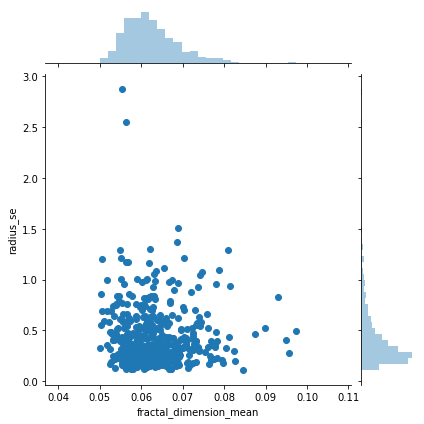

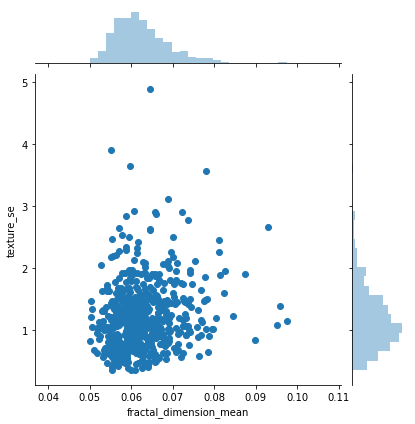

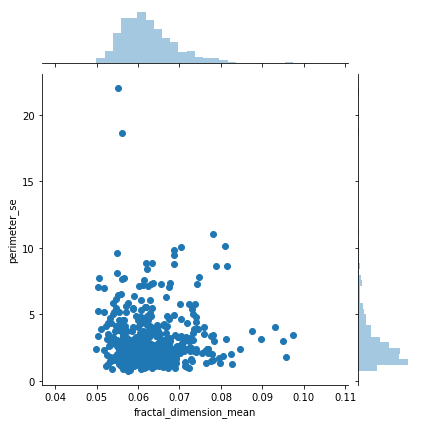

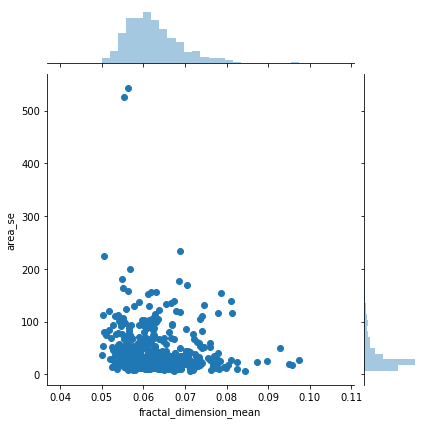

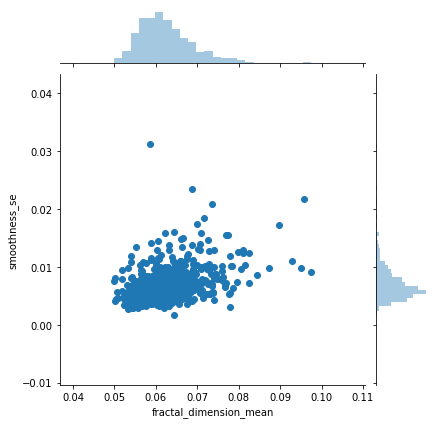

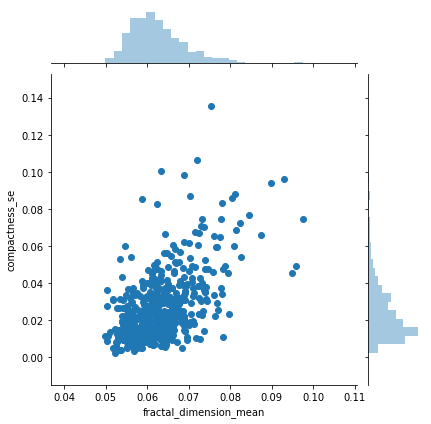

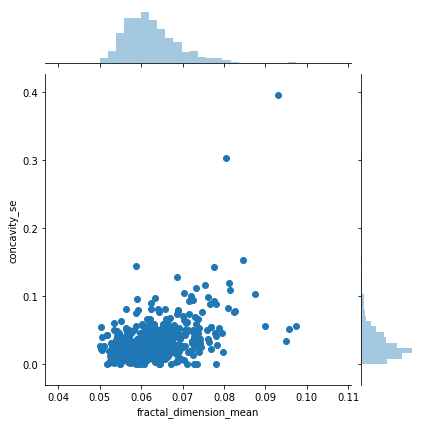

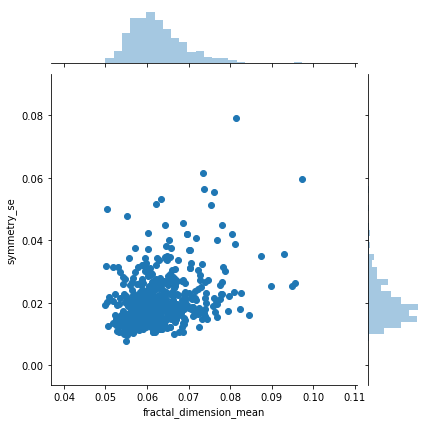

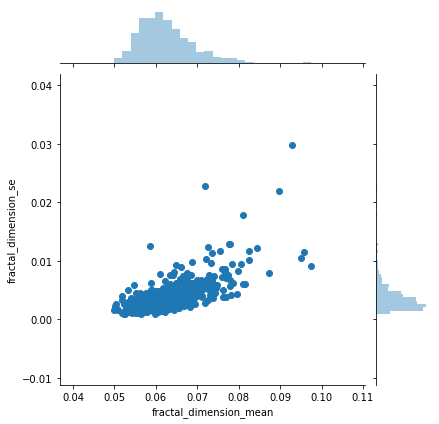

In [14]:
for x_column in mean_features:
    for y_cloumn in se_features:
        sns.jointplot(x= x_column,y=y_cloumn,data=df,kind='scatter');

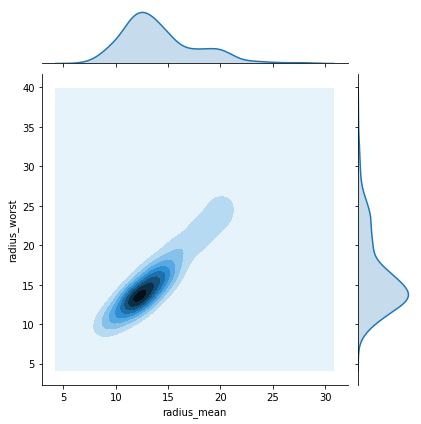

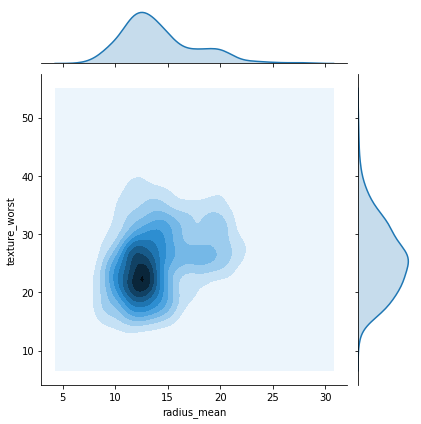

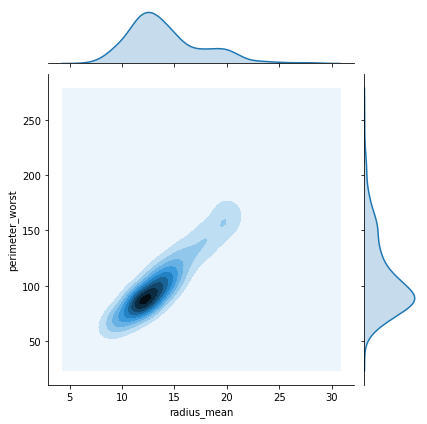

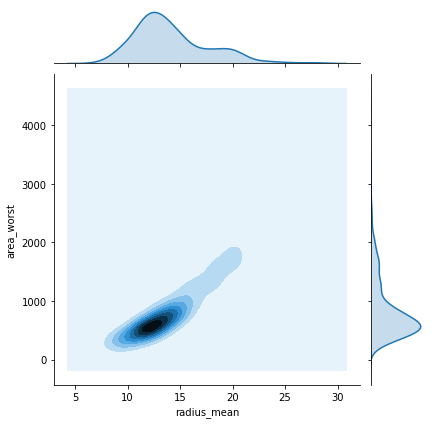

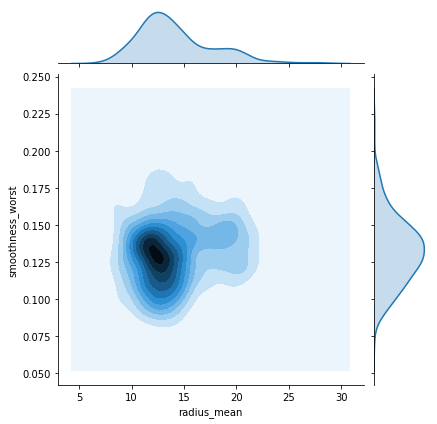

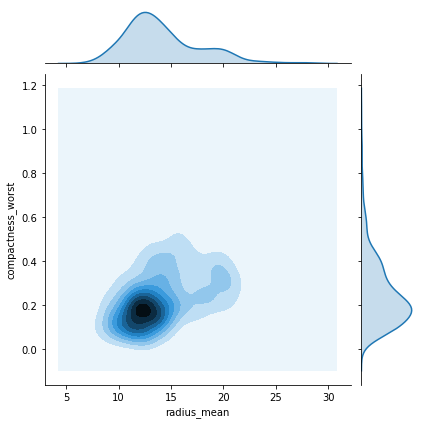

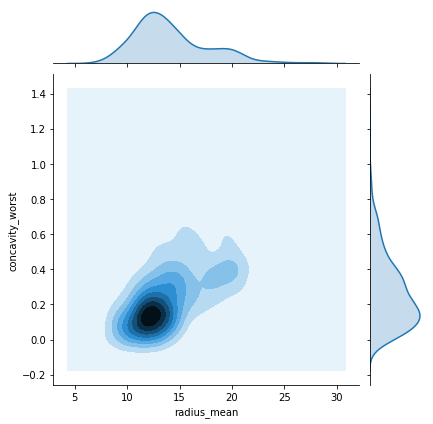

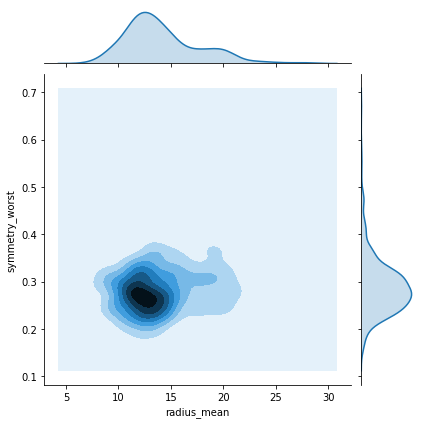

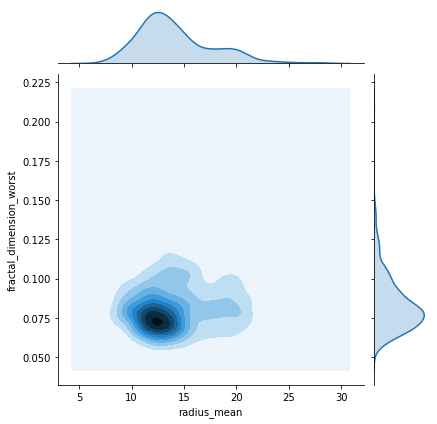

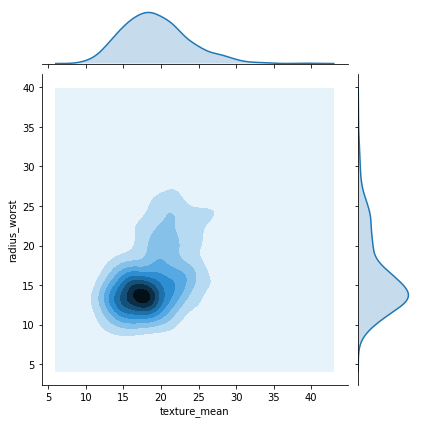

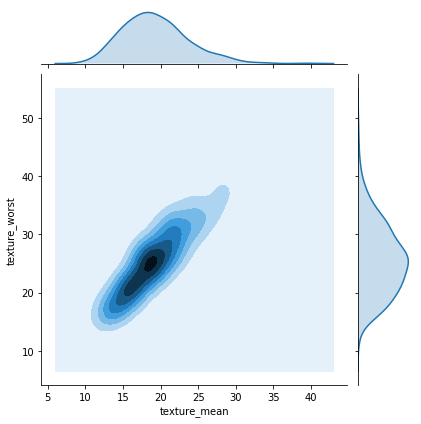

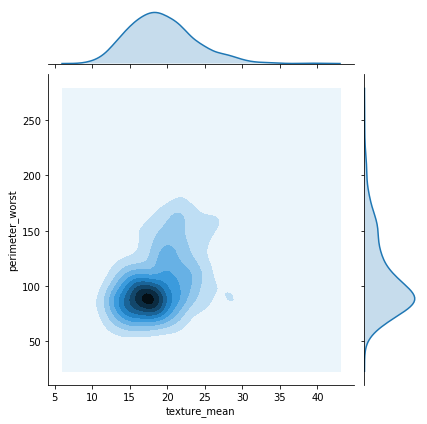

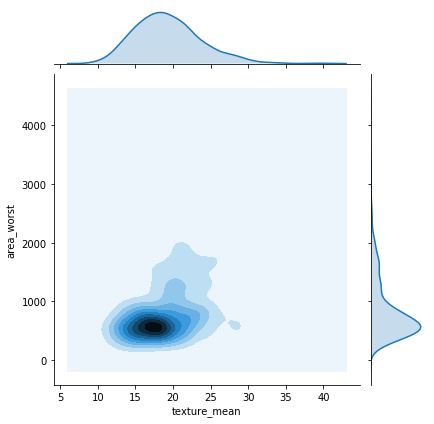

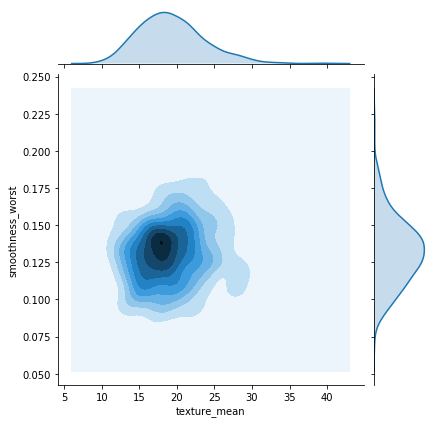

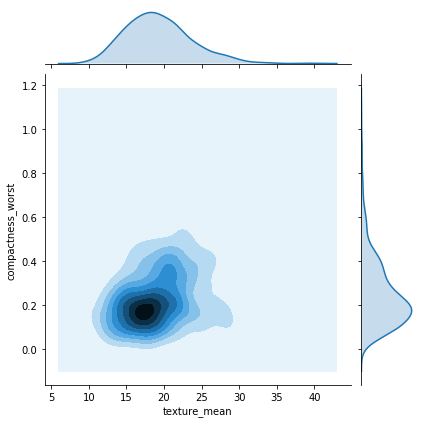

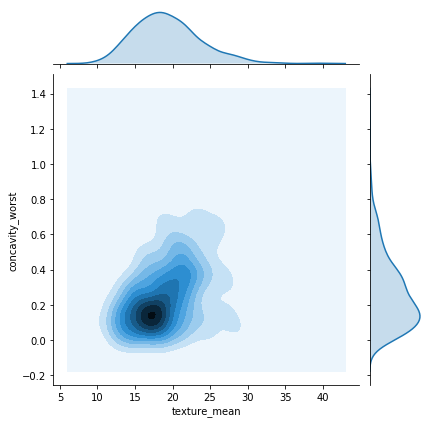

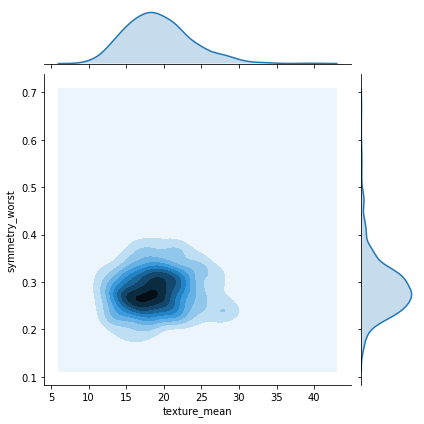

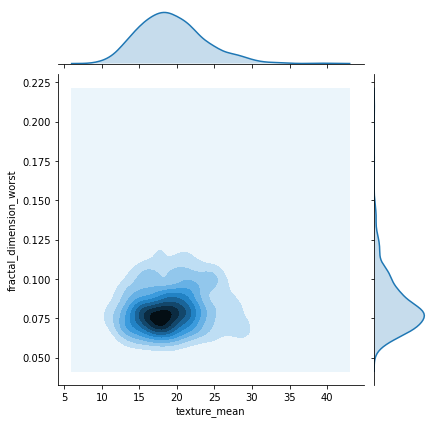

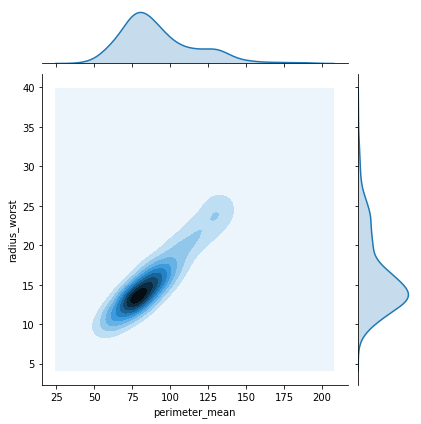

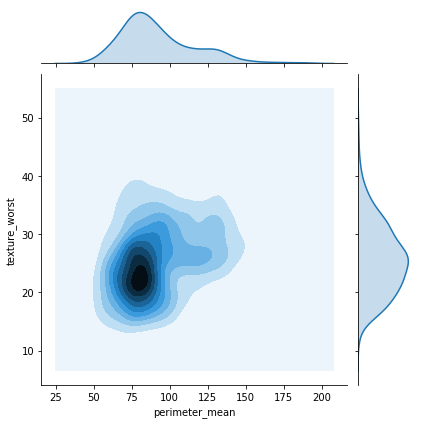

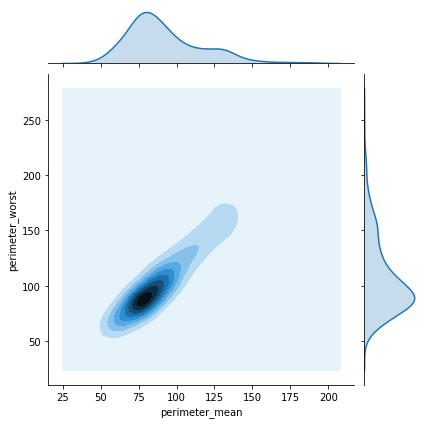

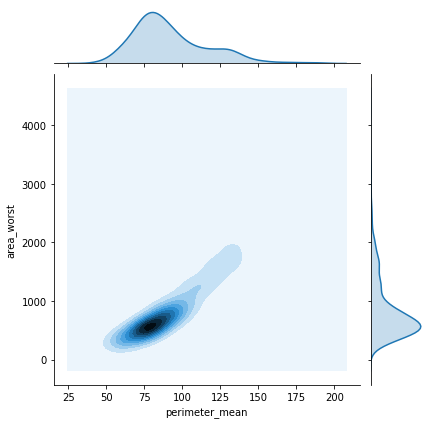

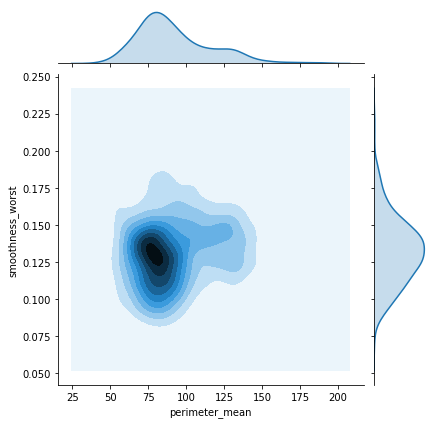

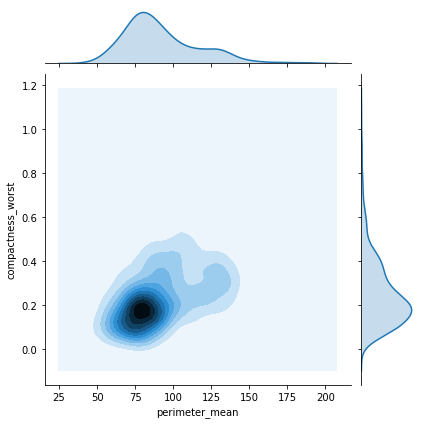

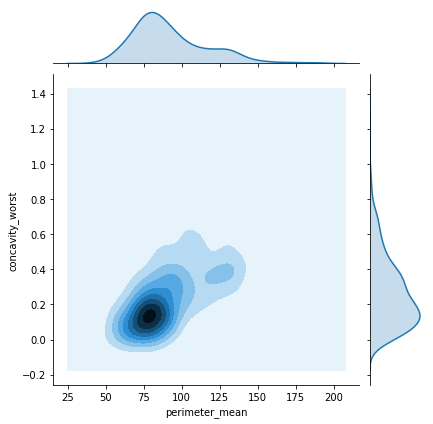

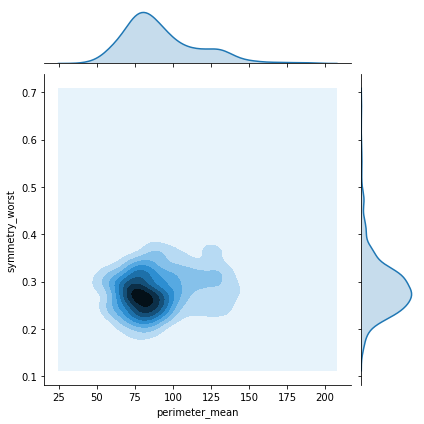

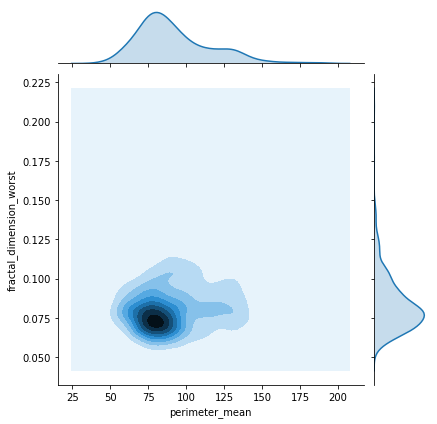

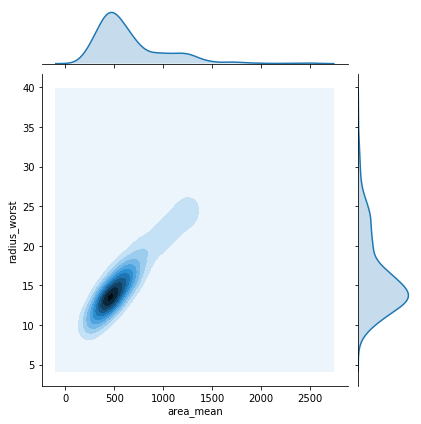

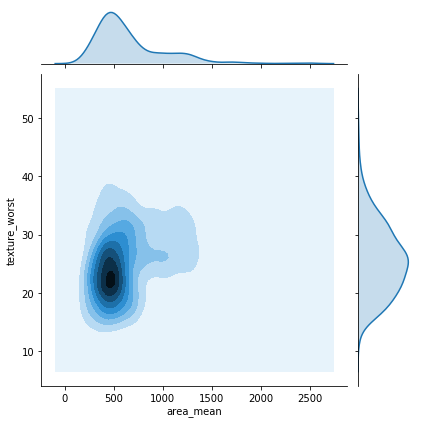

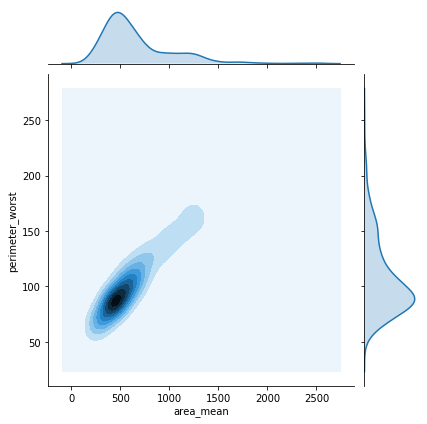

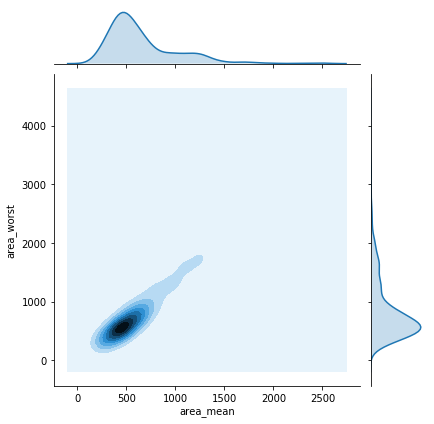

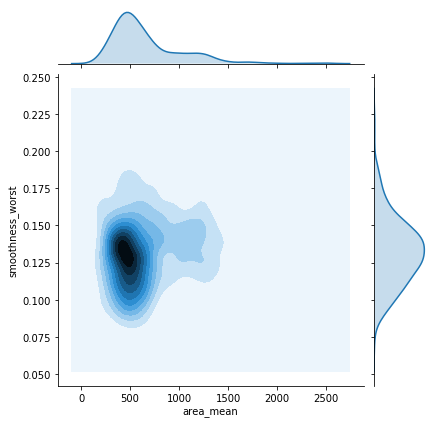

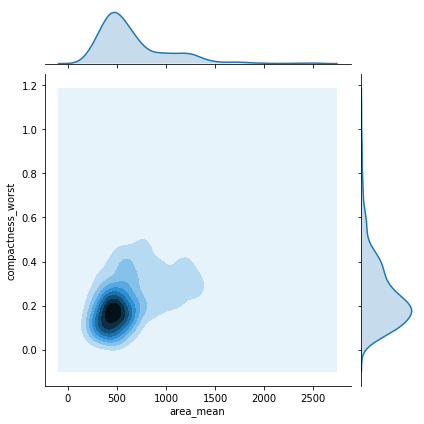

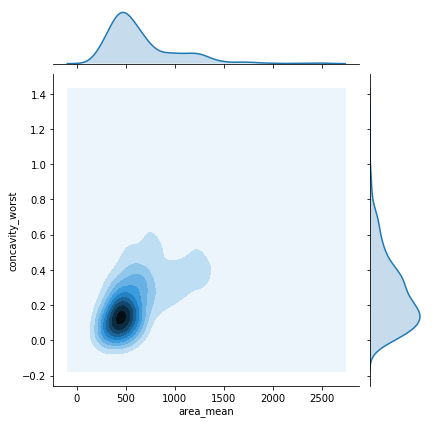

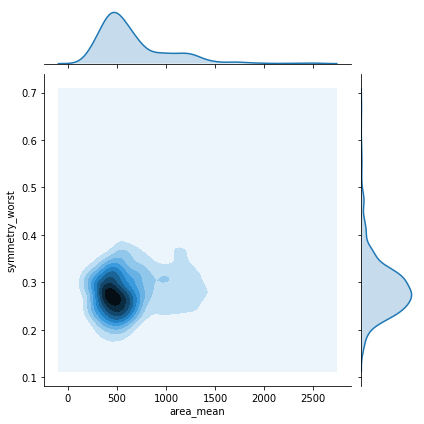

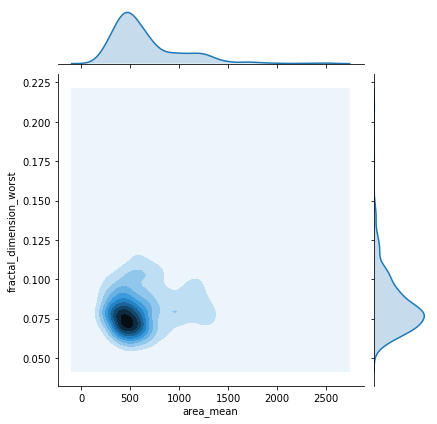

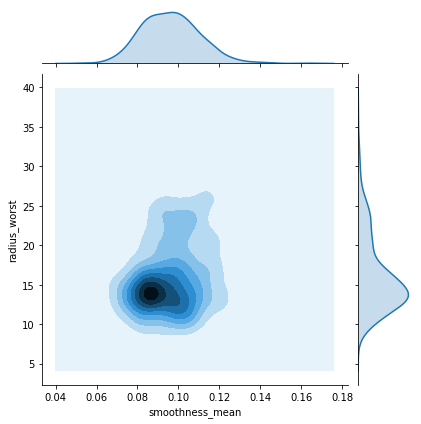

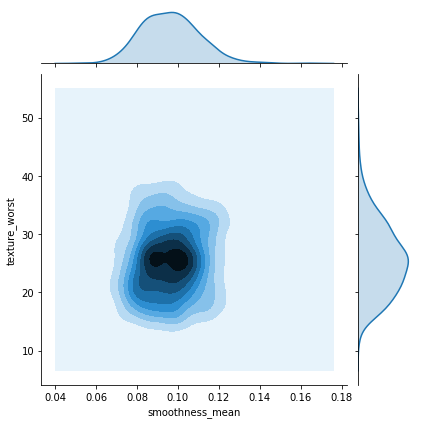

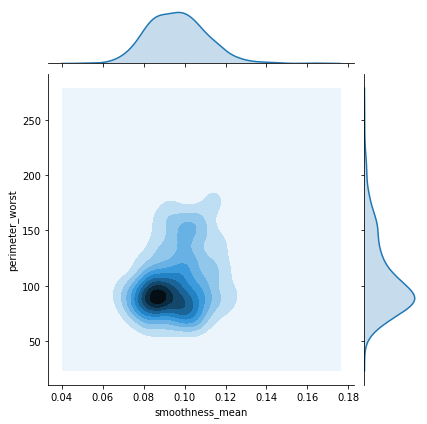

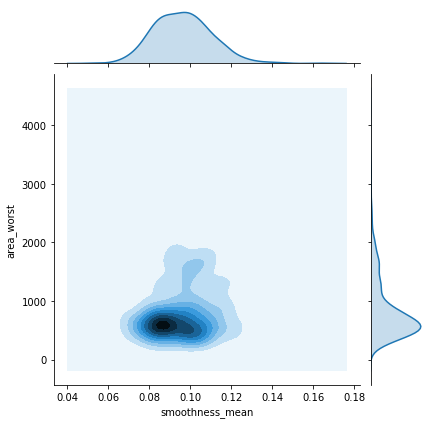

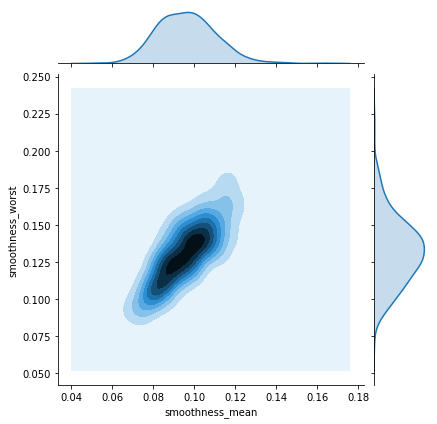

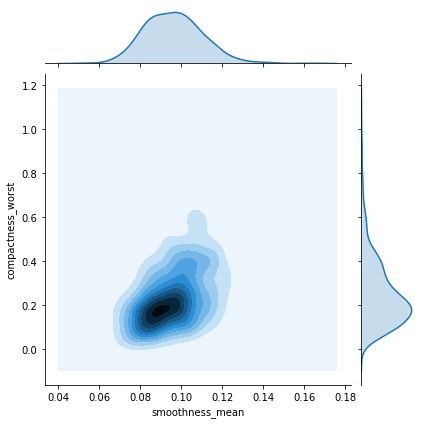

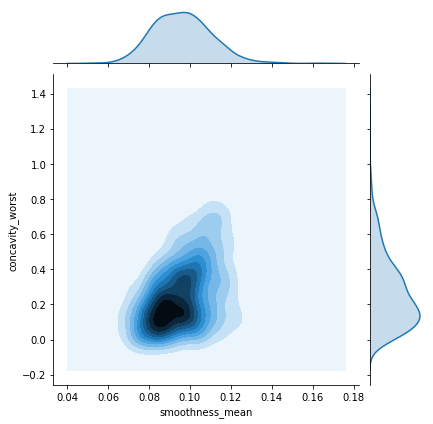

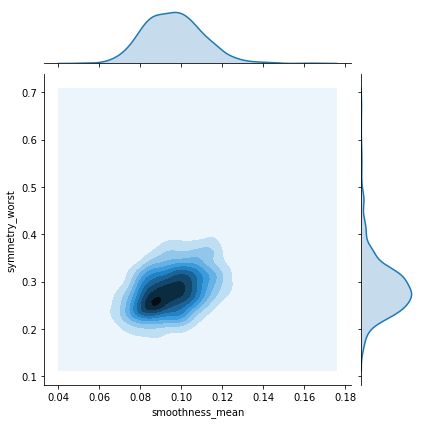

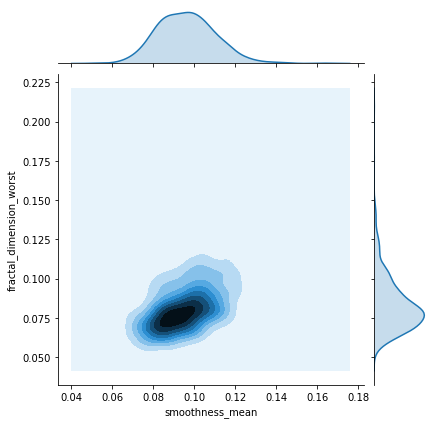

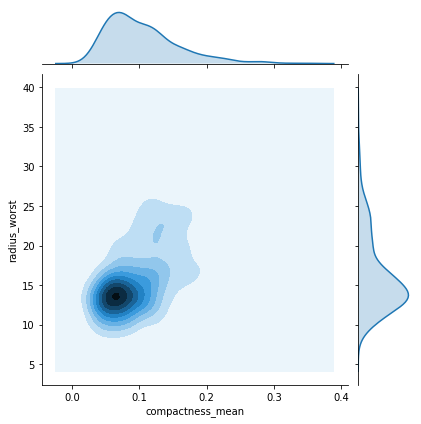

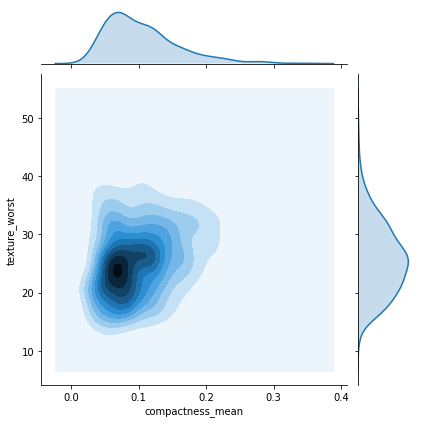

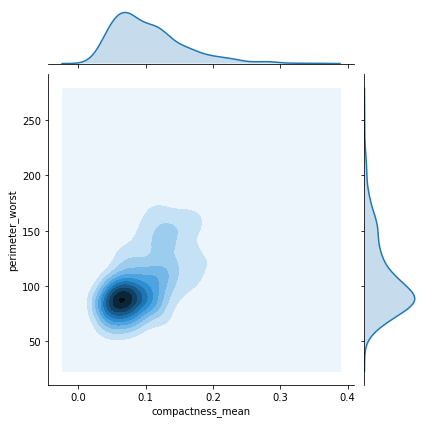

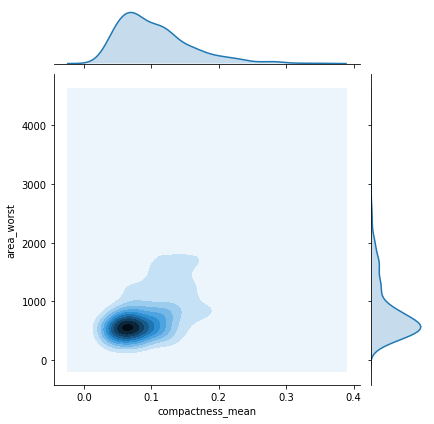

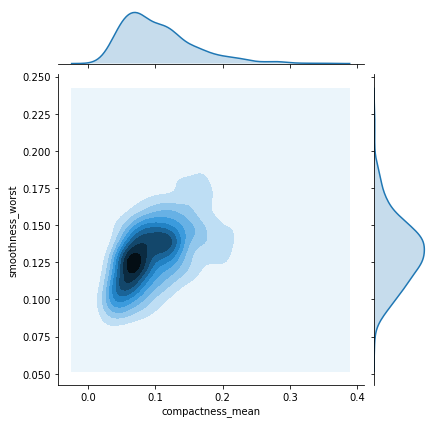

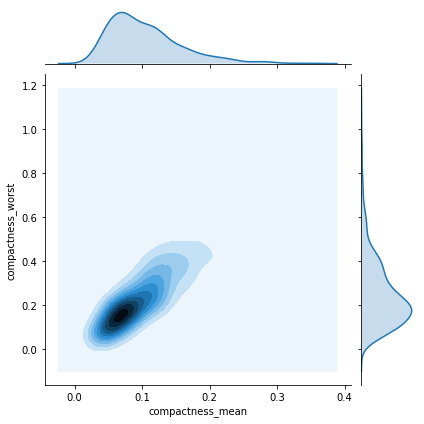

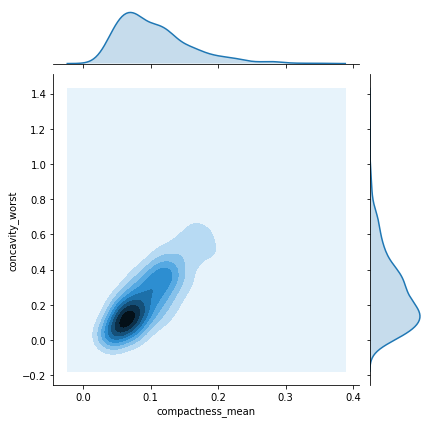

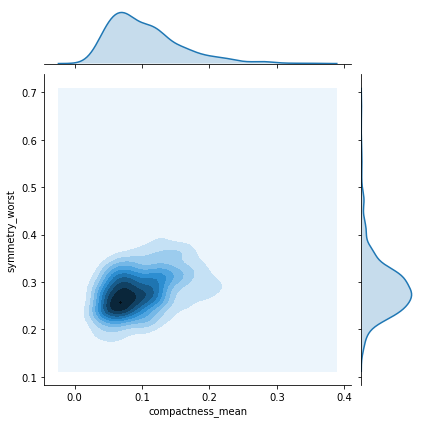

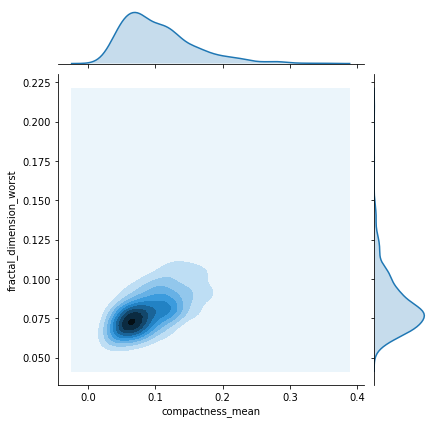

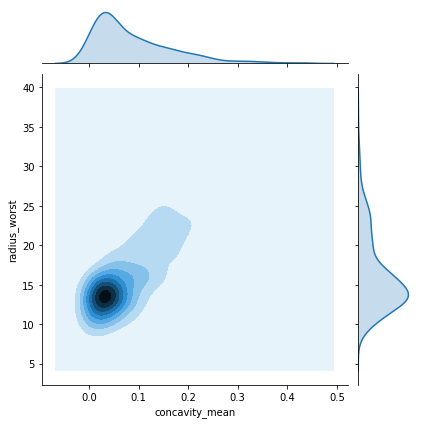

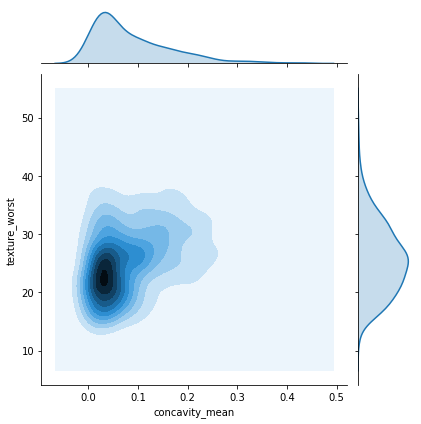

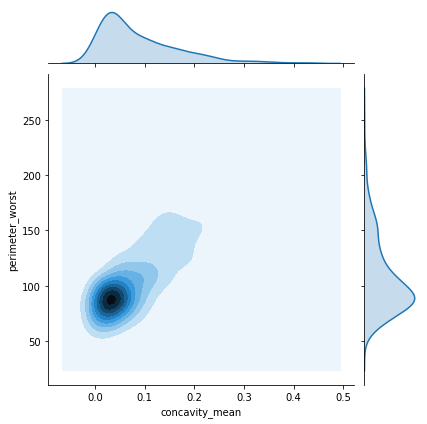

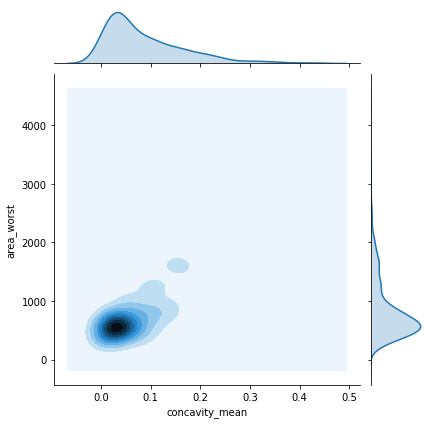

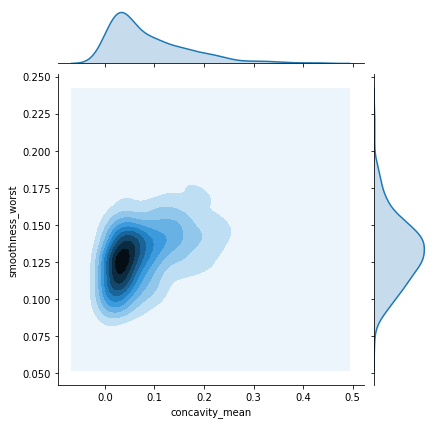

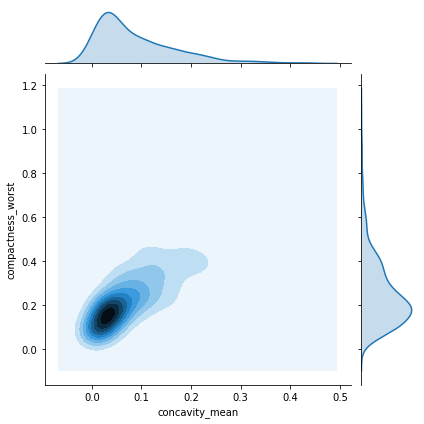

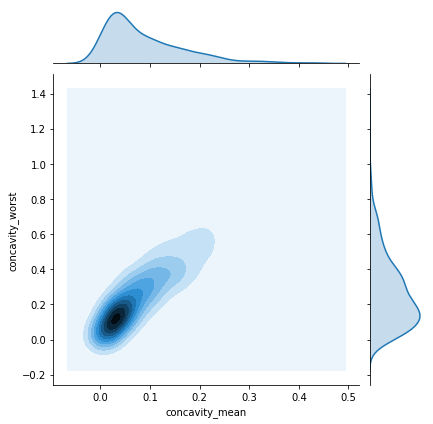

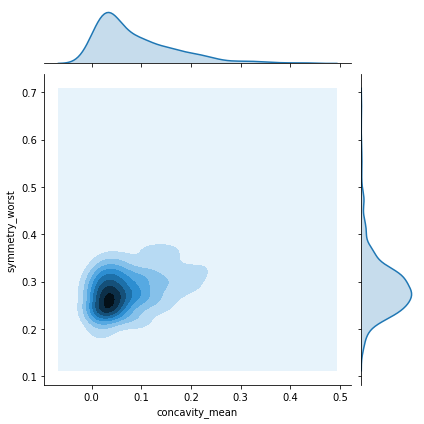

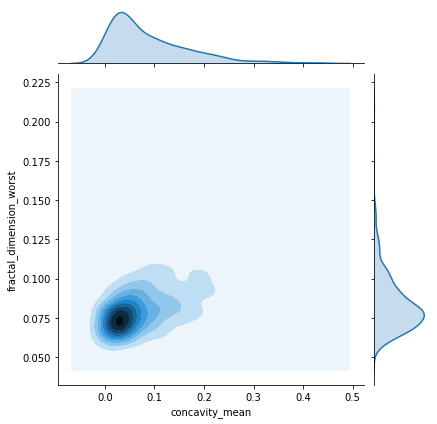

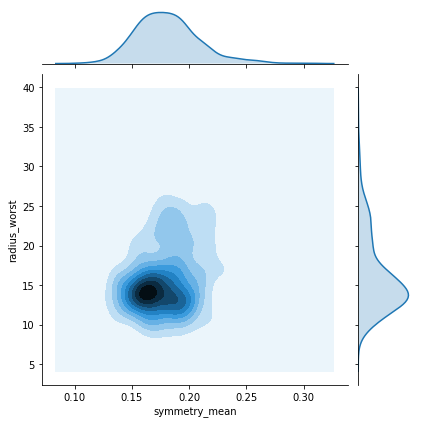

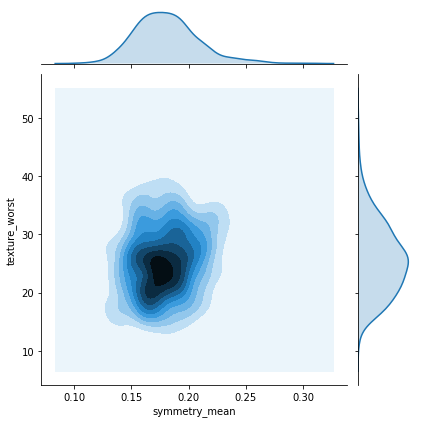

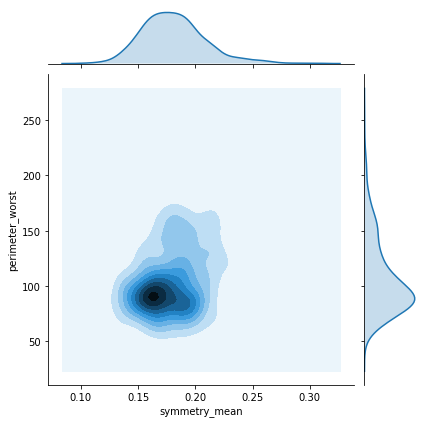

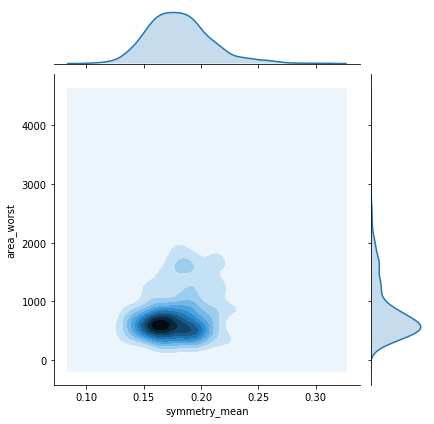

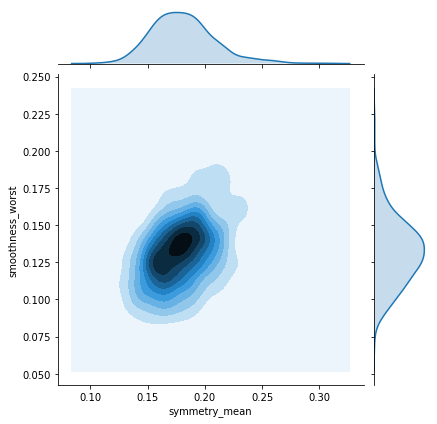

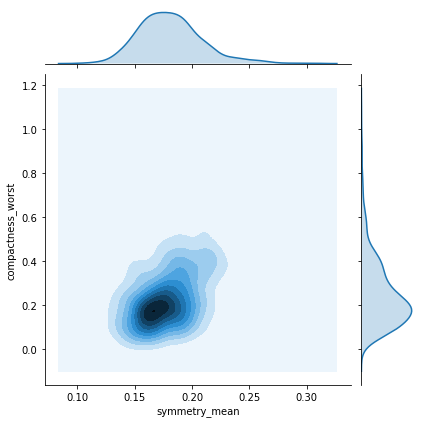

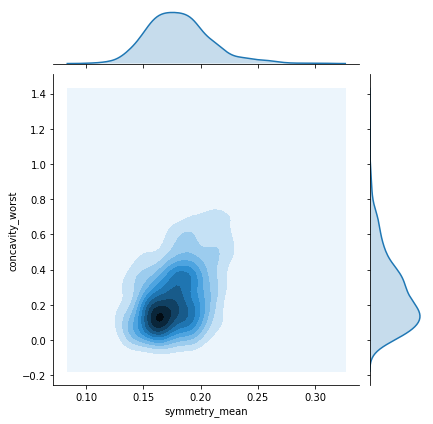

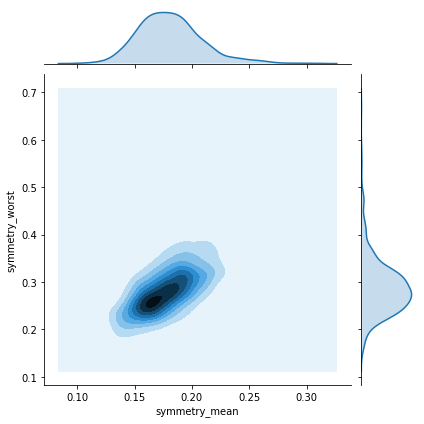

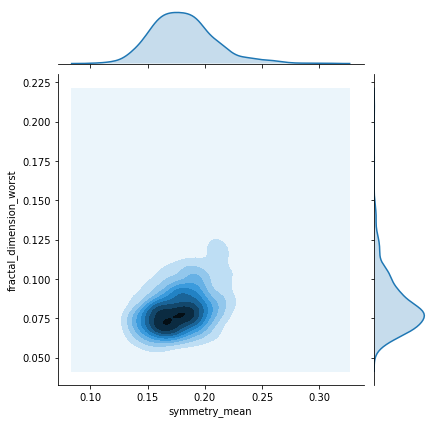

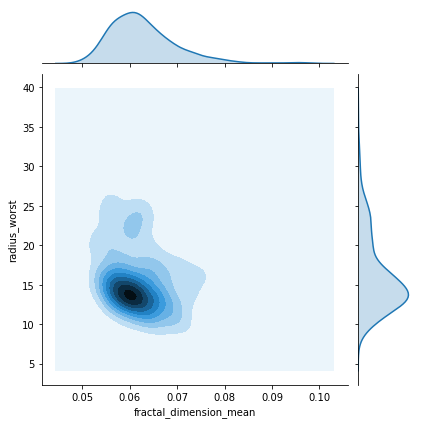

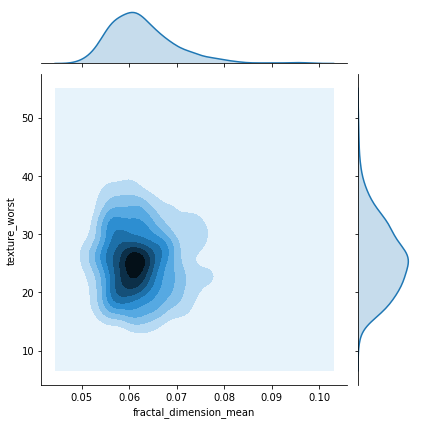

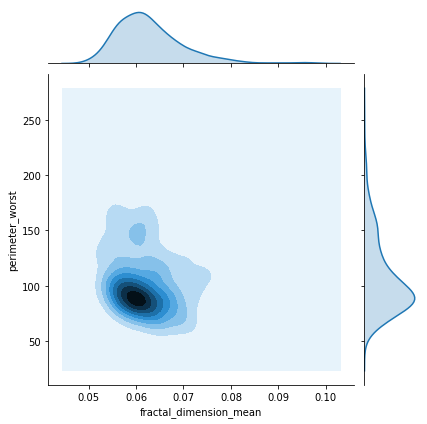

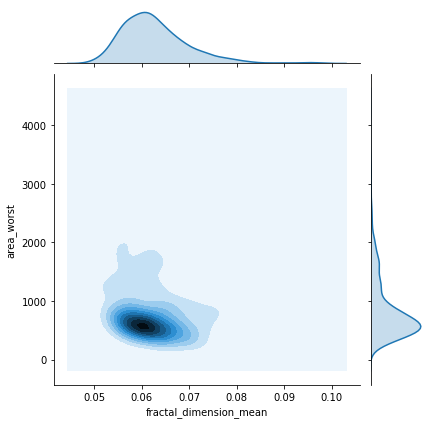

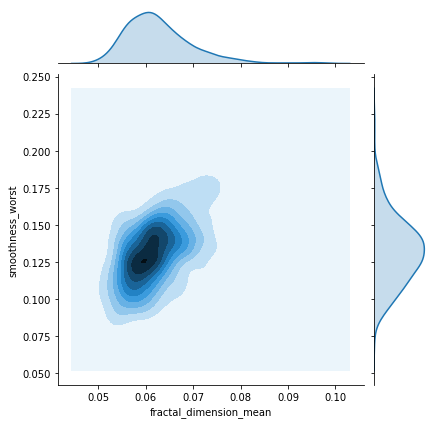

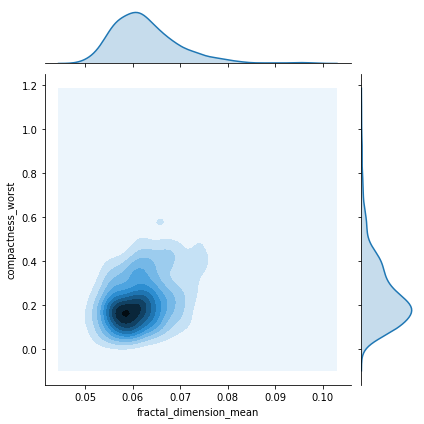

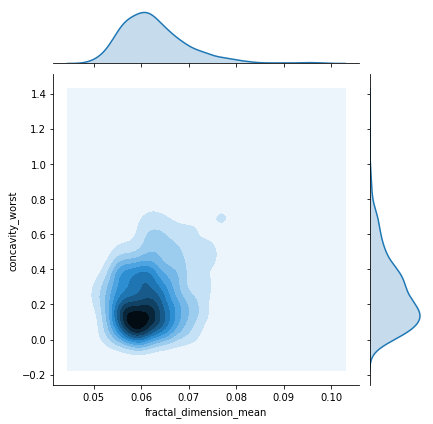

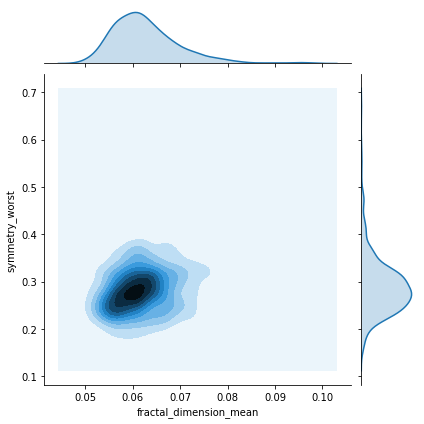

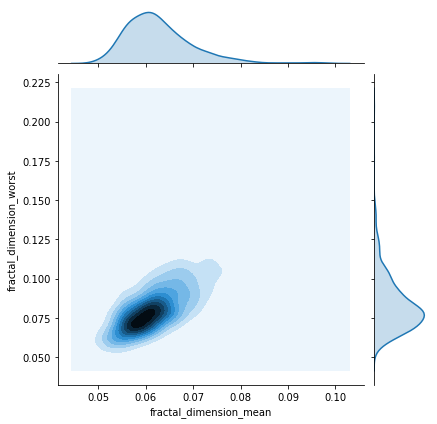

In [15]:
for x_column in mean_features:
    for y_cloumn in worst_features:
        sns.jointplot(x= x_column,y=y_cloumn,data=df,kind='kde');

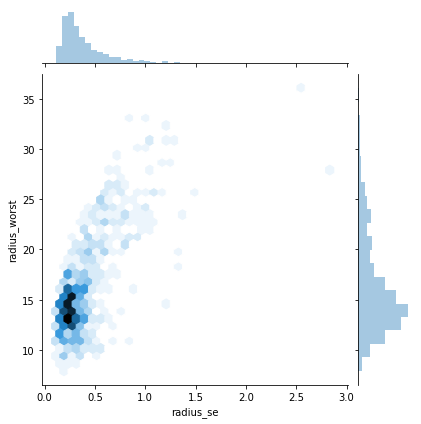

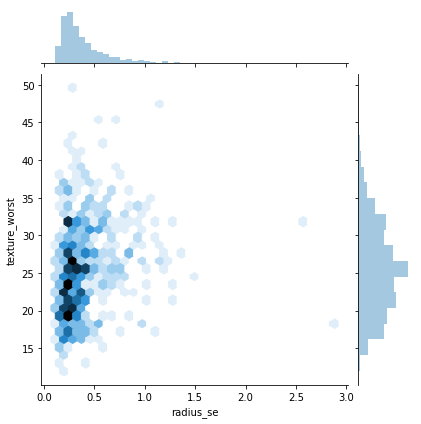

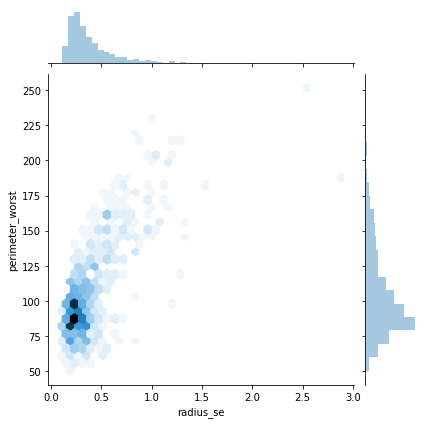

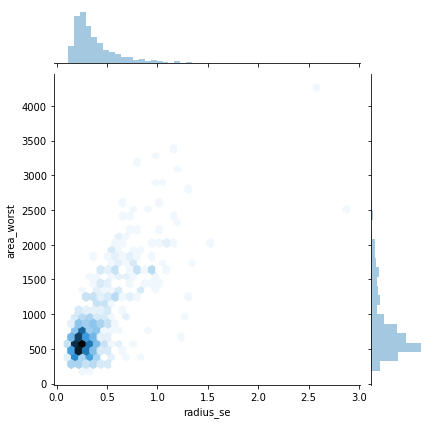

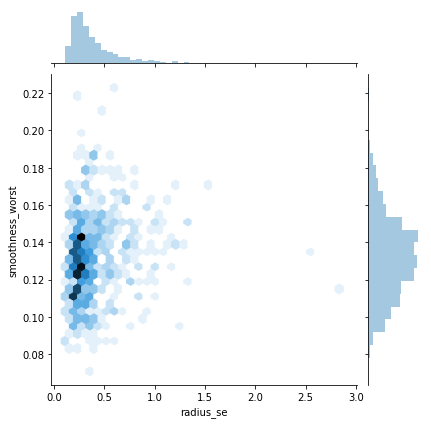

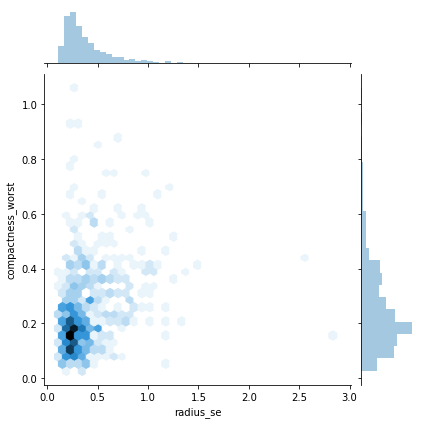

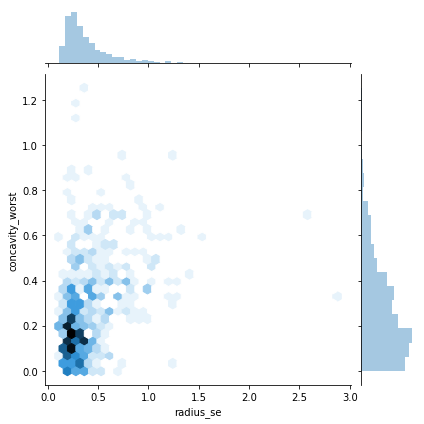

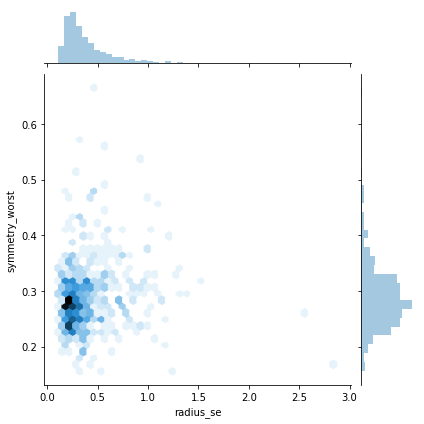

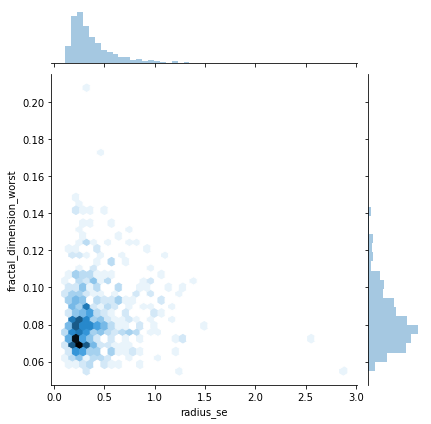

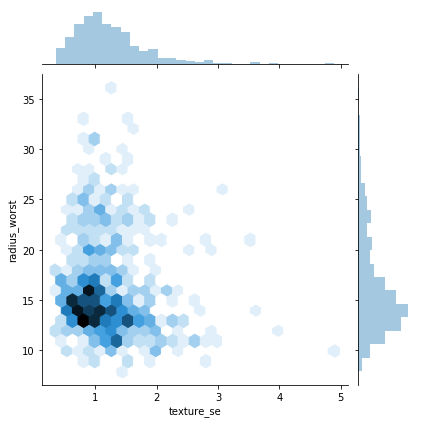

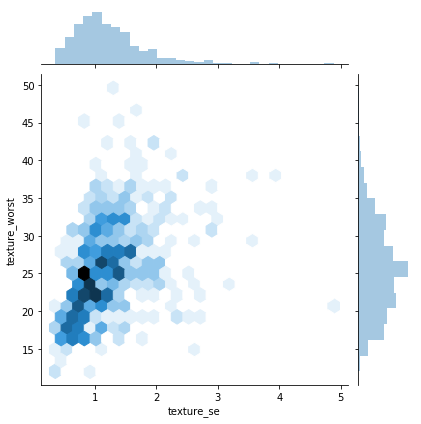

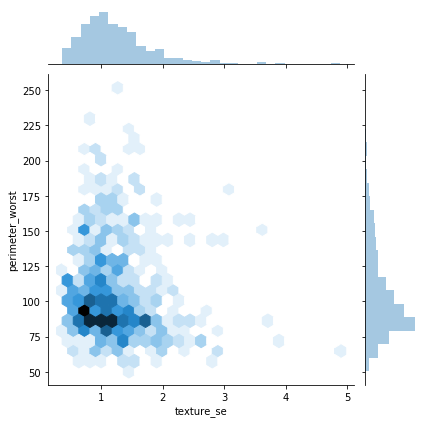

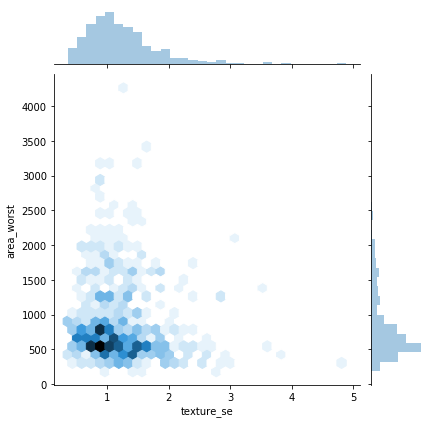

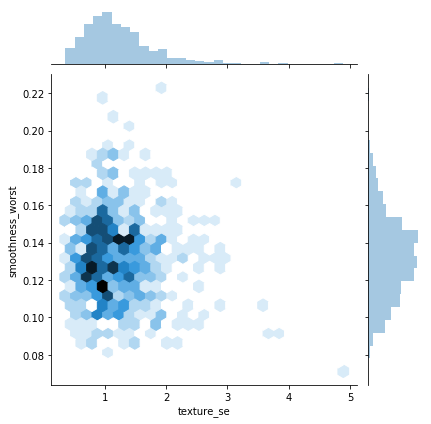

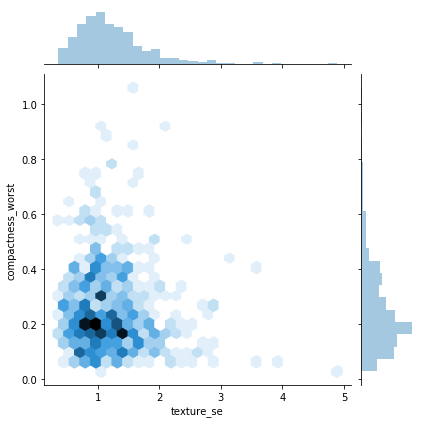

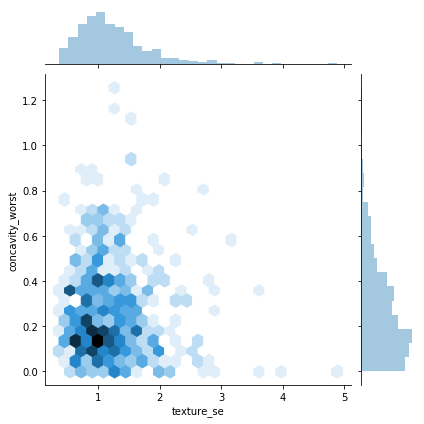

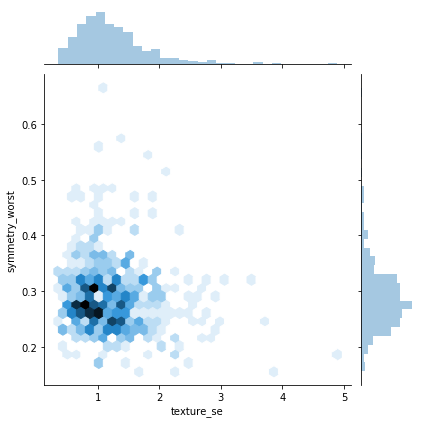

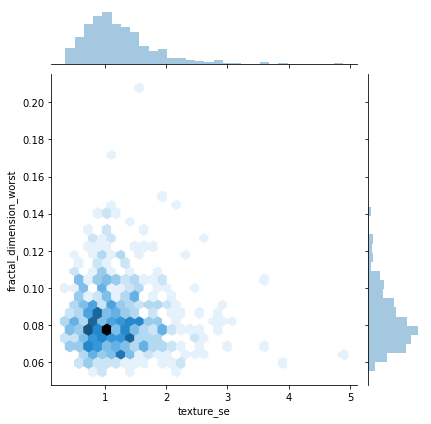

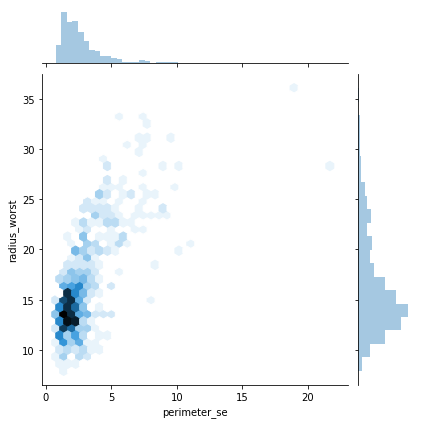

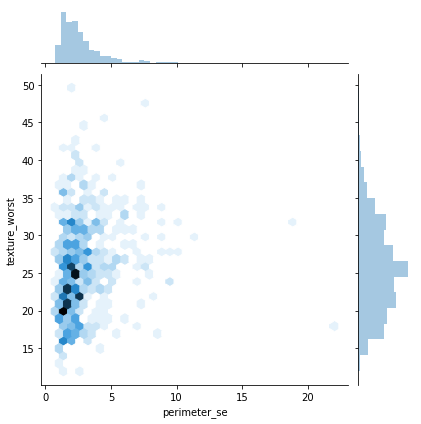

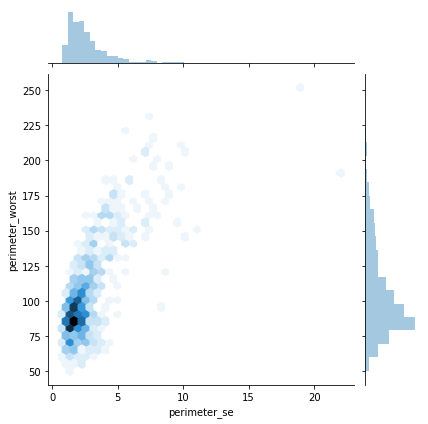

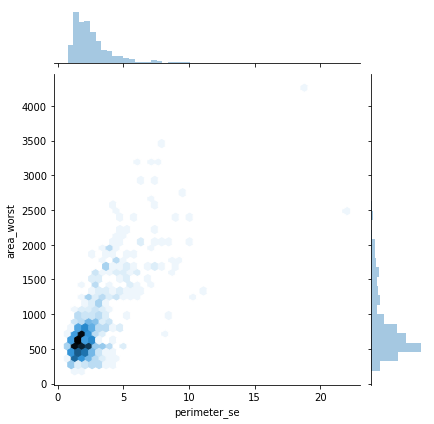

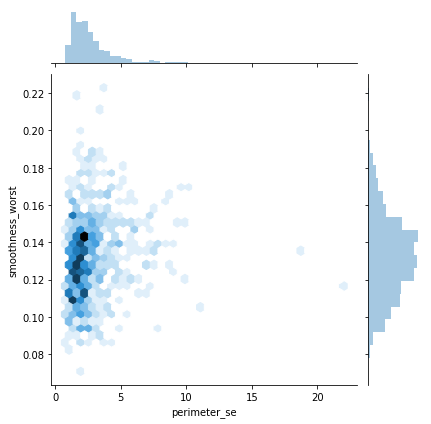

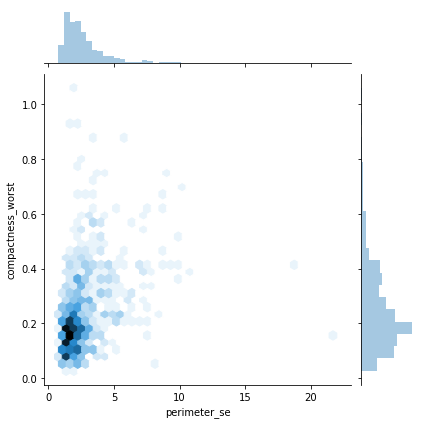

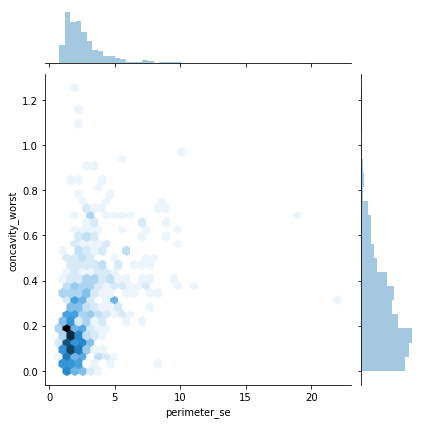

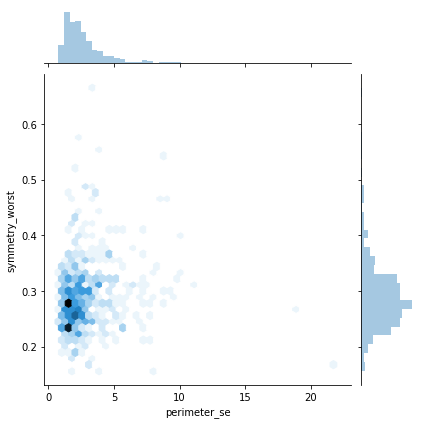

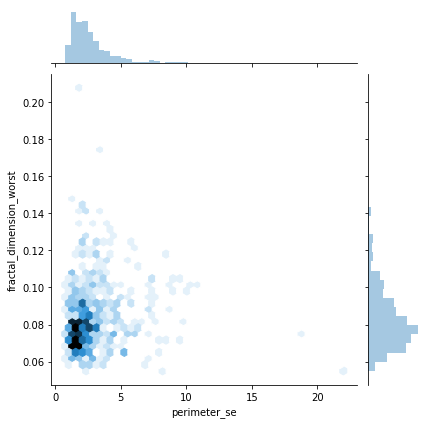

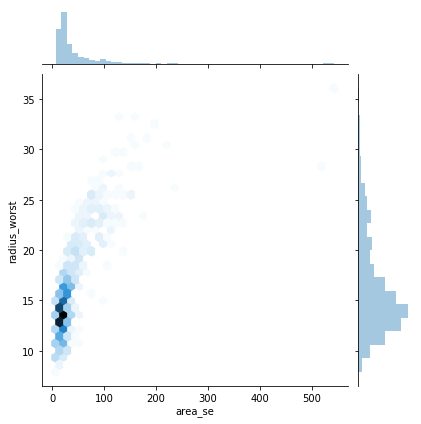

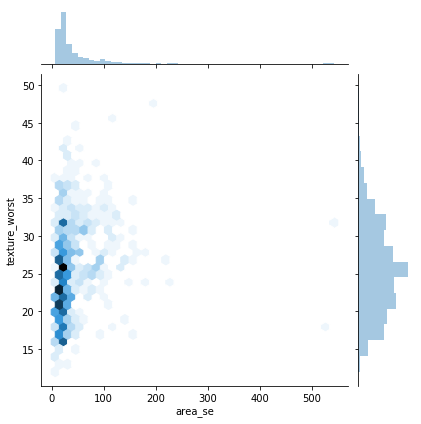

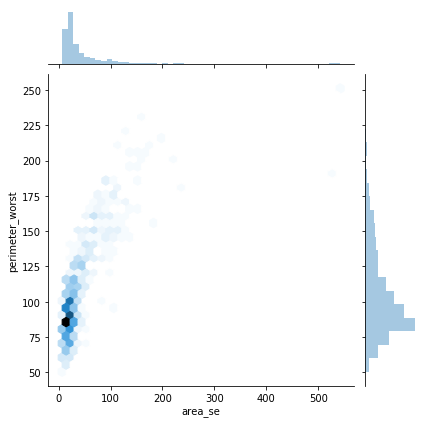

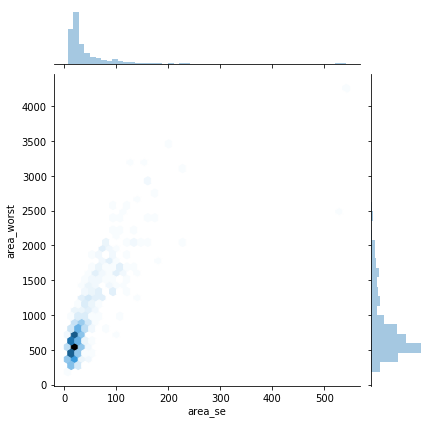

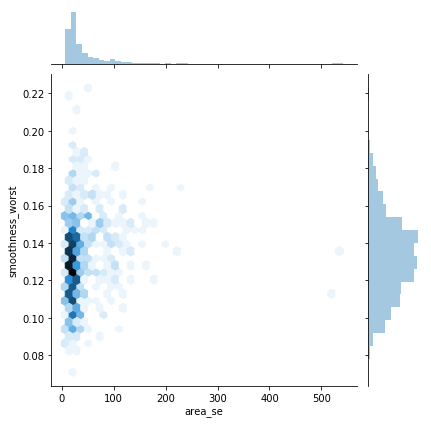

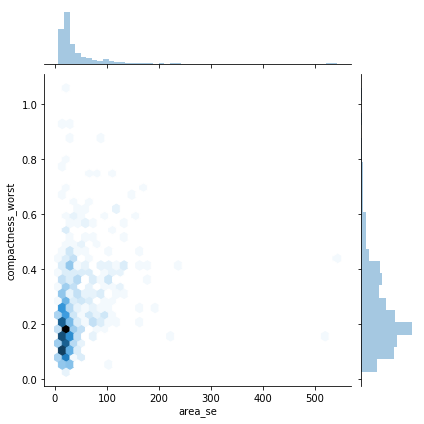

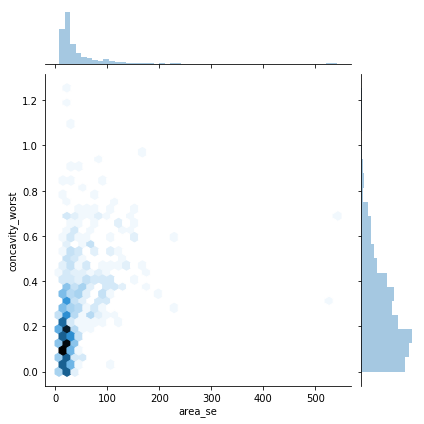

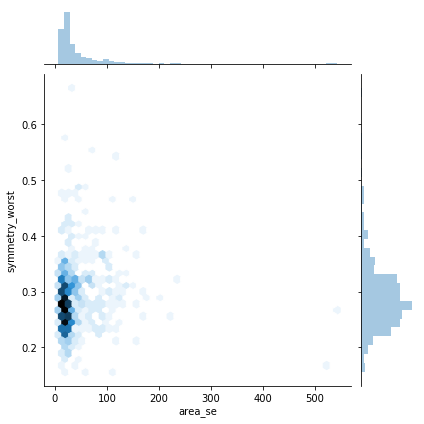

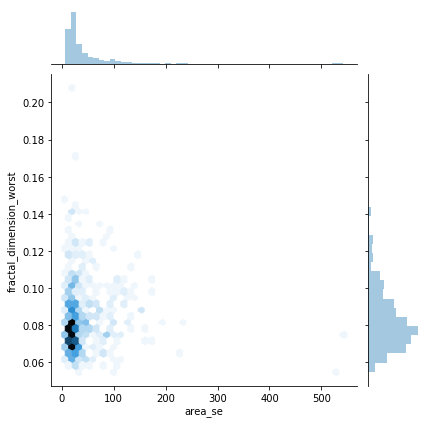

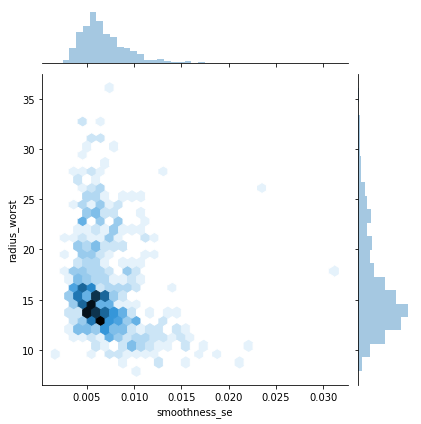

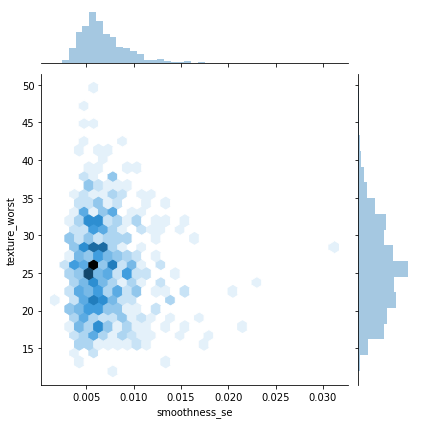

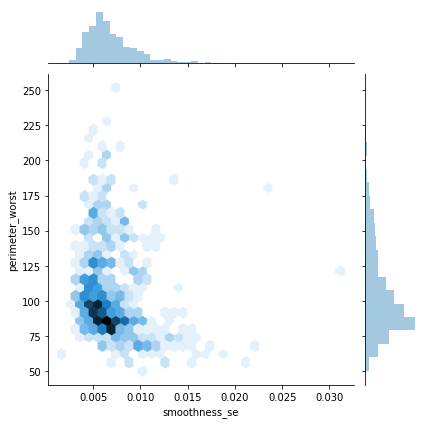

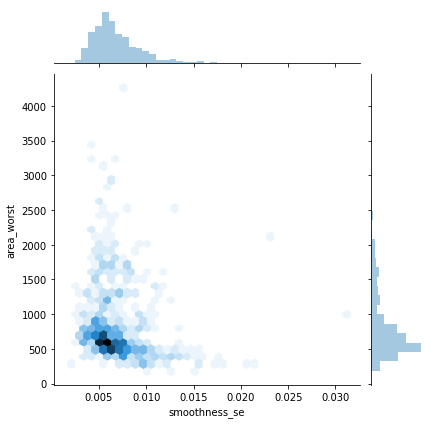

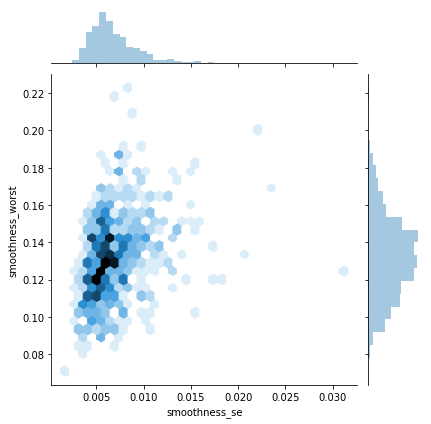

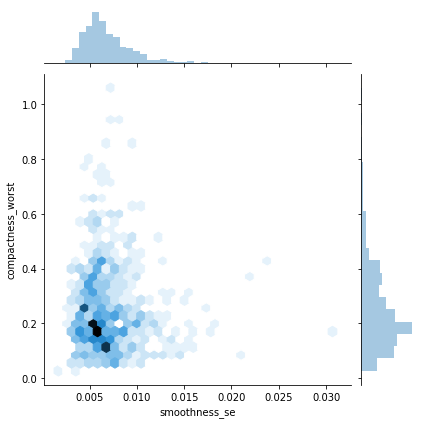

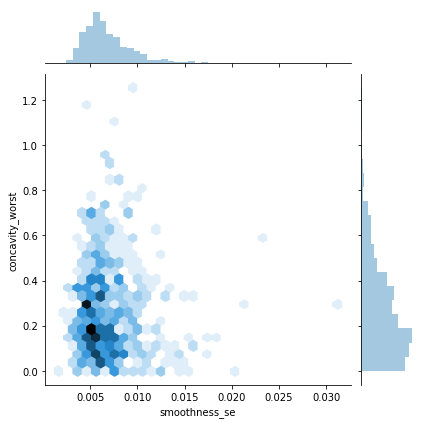

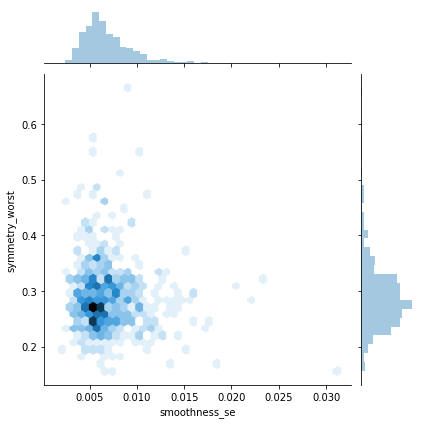

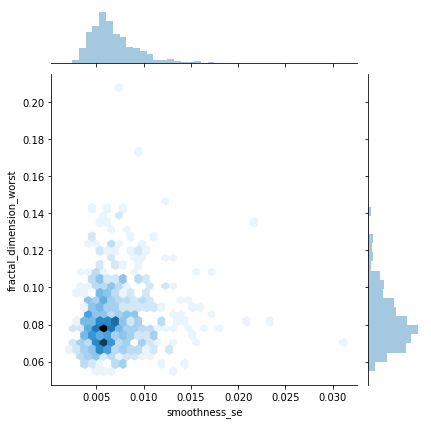

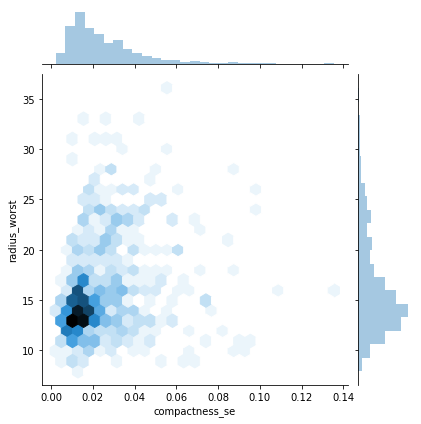

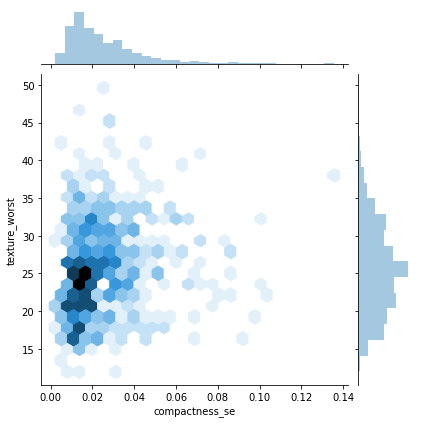

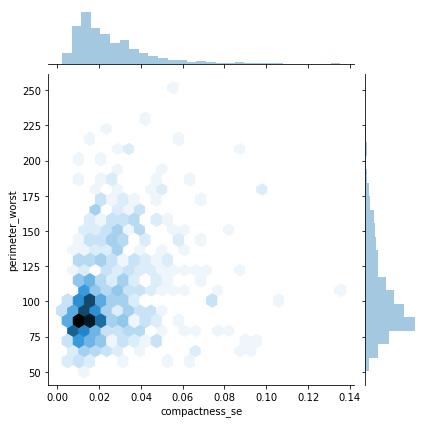

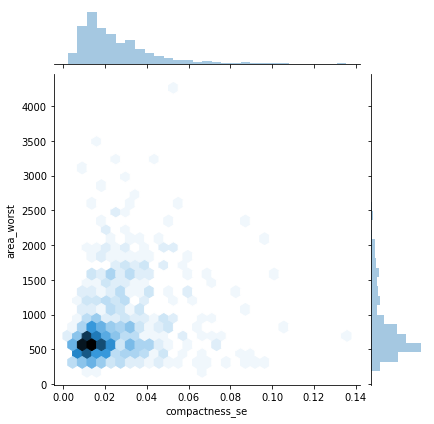

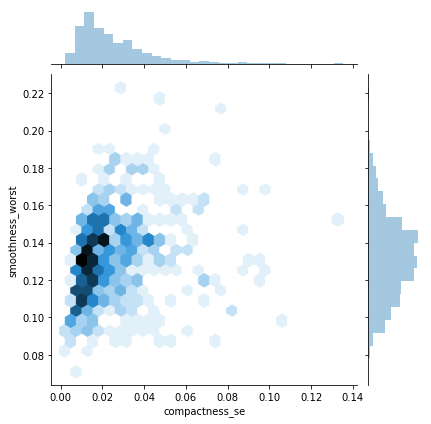

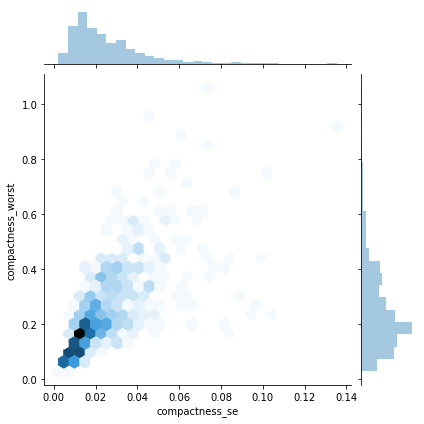

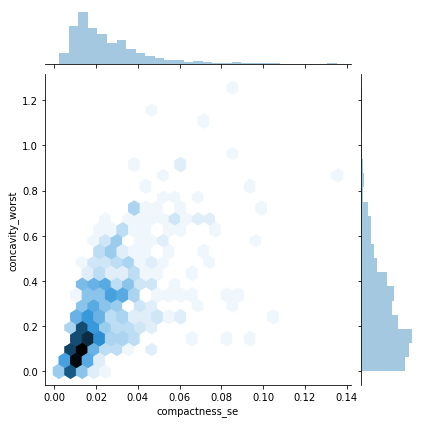

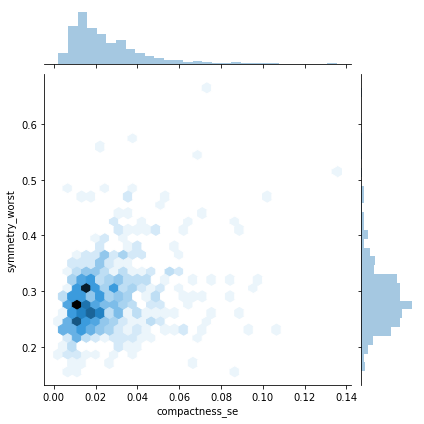

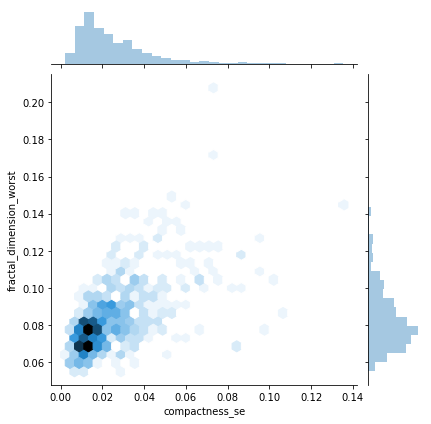

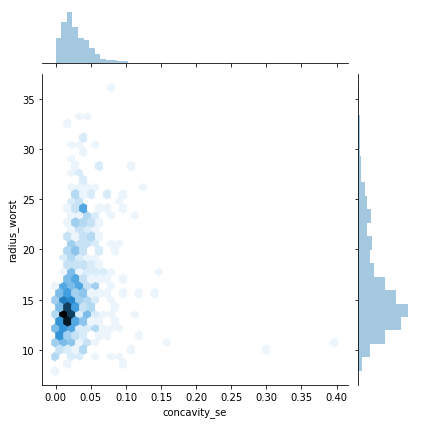

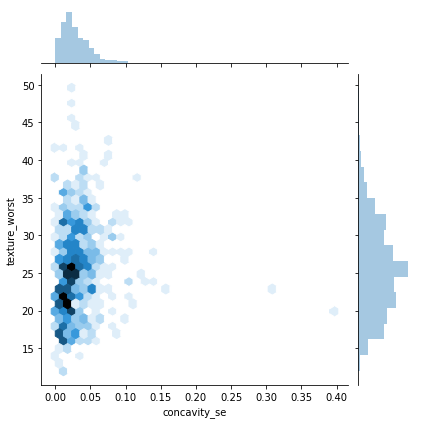

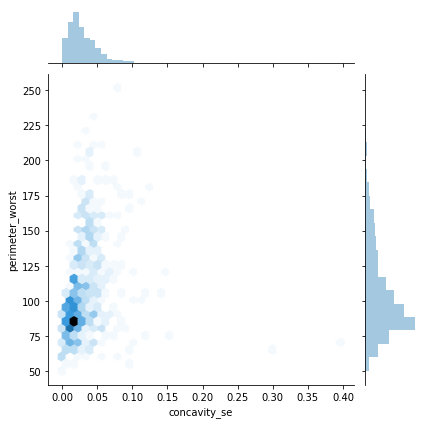

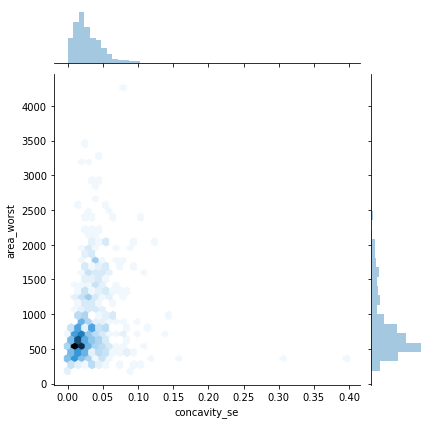

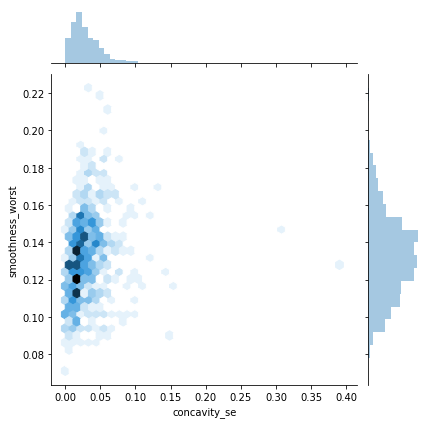

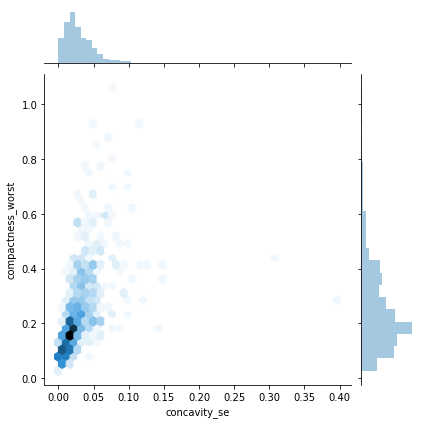

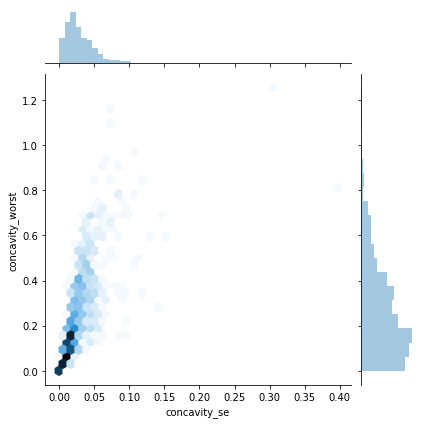

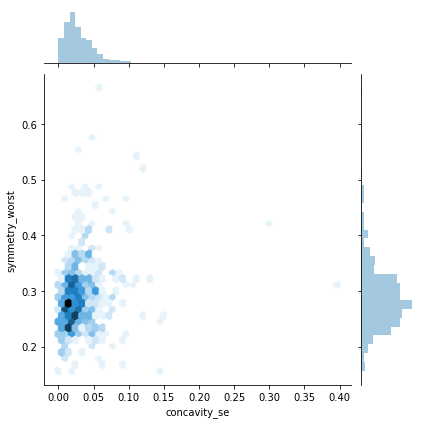

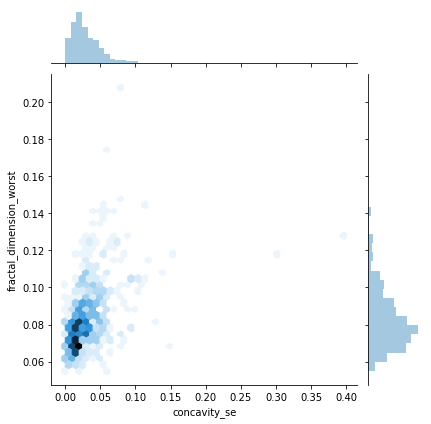

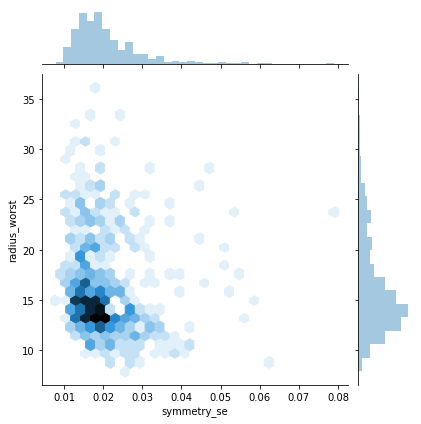

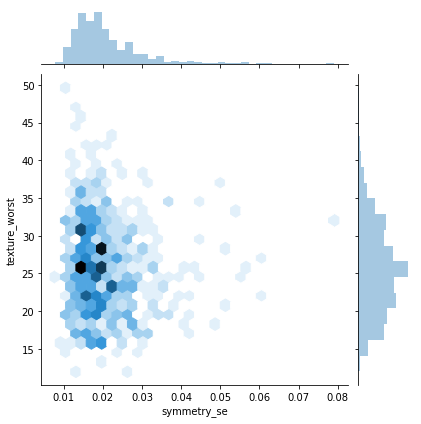

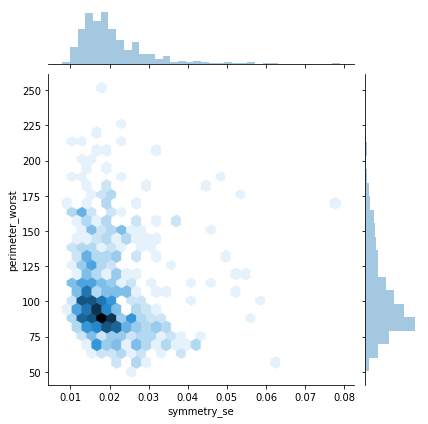

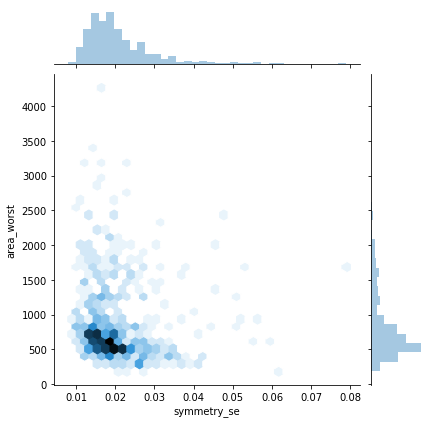

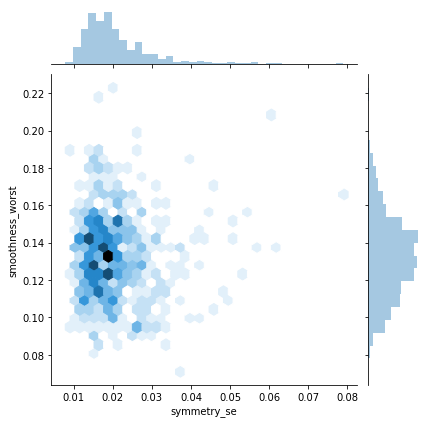

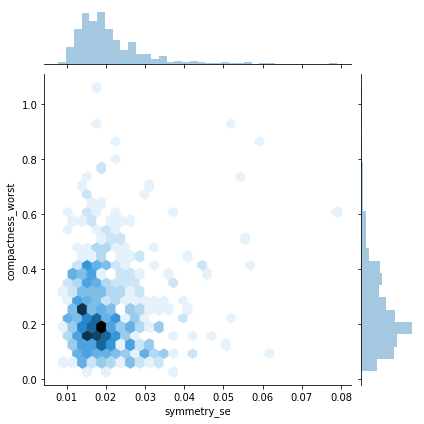

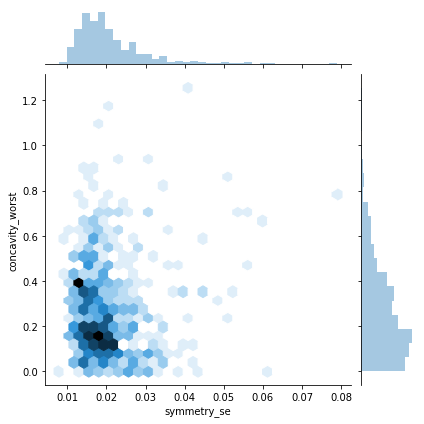

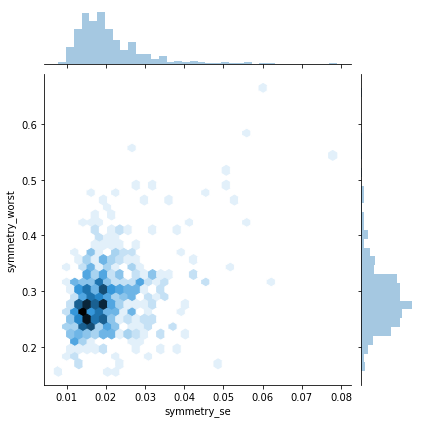

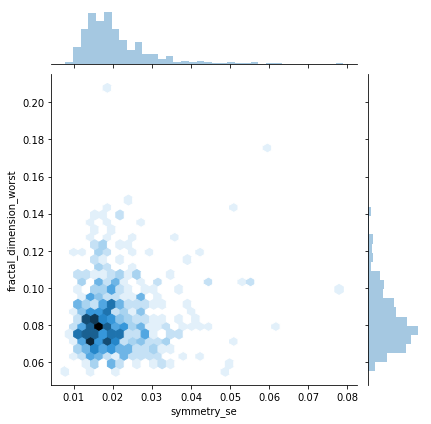

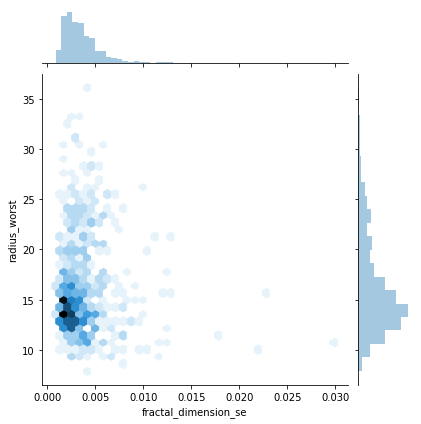

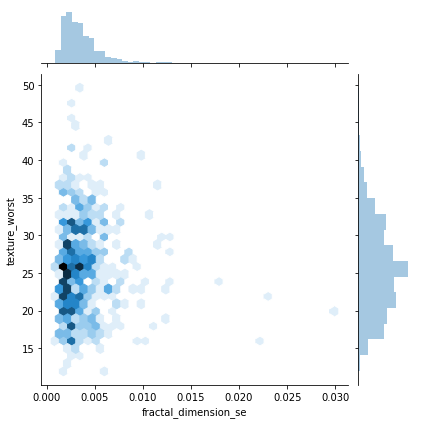

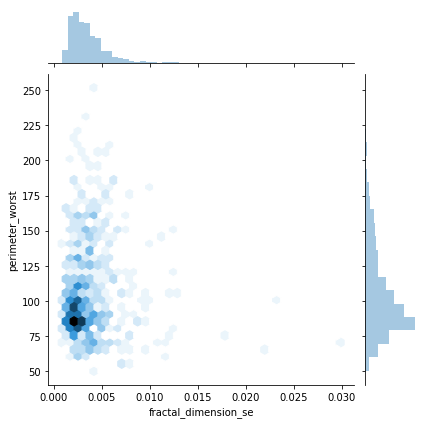

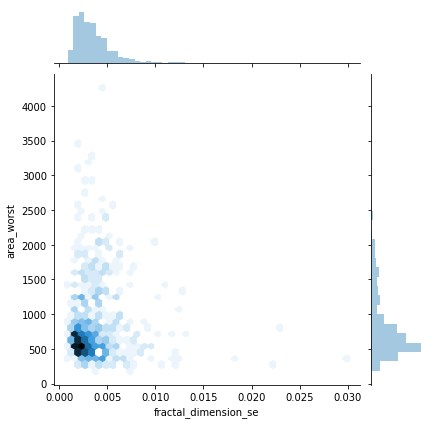

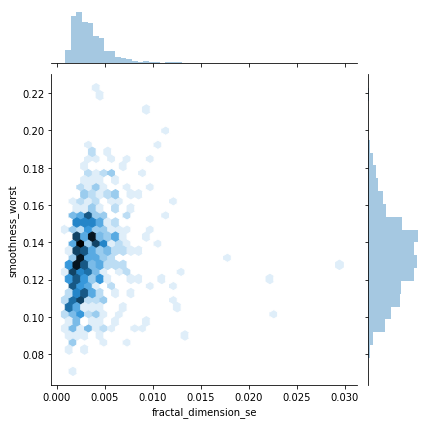

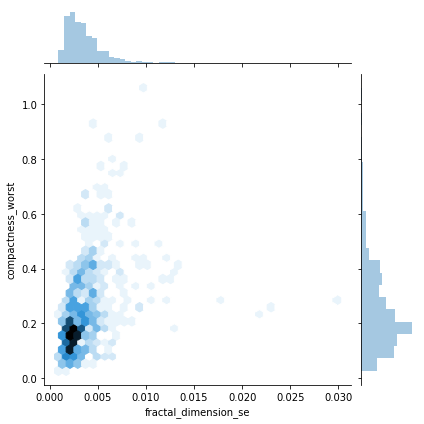

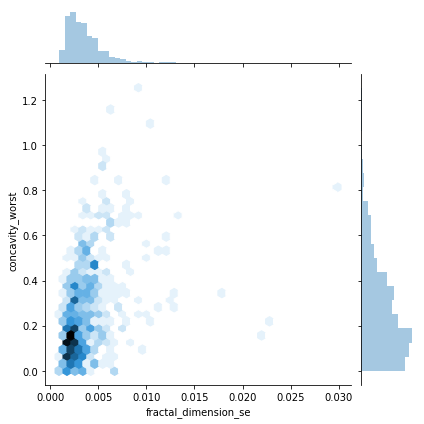

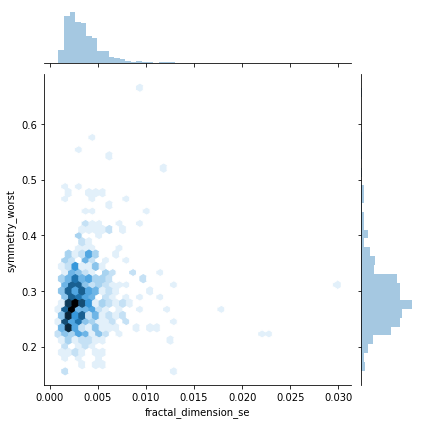

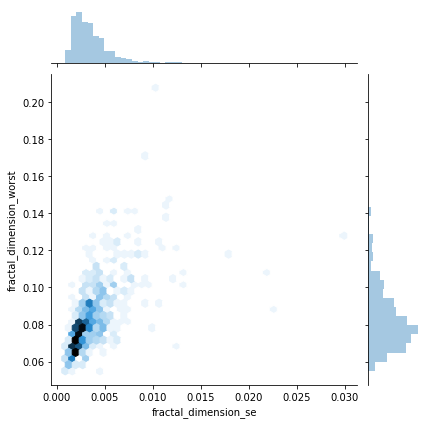

In [16]:
for x_column in se_features:
    for y_cloumn in worst_features:
        sns.jointplot(x= x_column,y=y_cloumn,data=df,kind='hex');

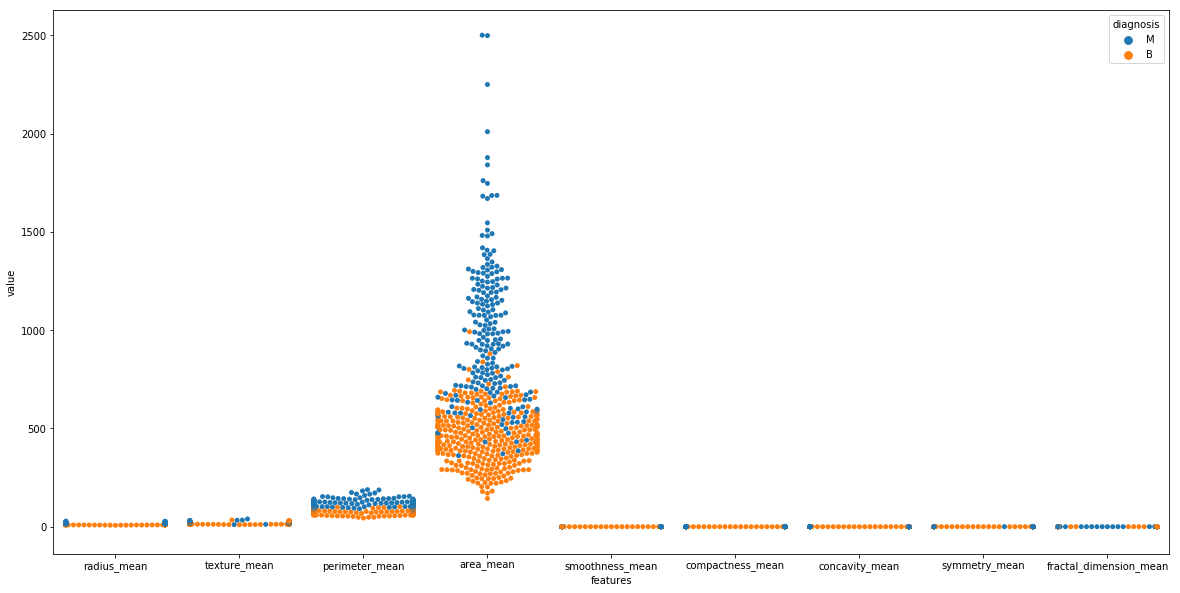

In [17]:
data = pd.concat([df.diagnosis,df[mean_features]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data);

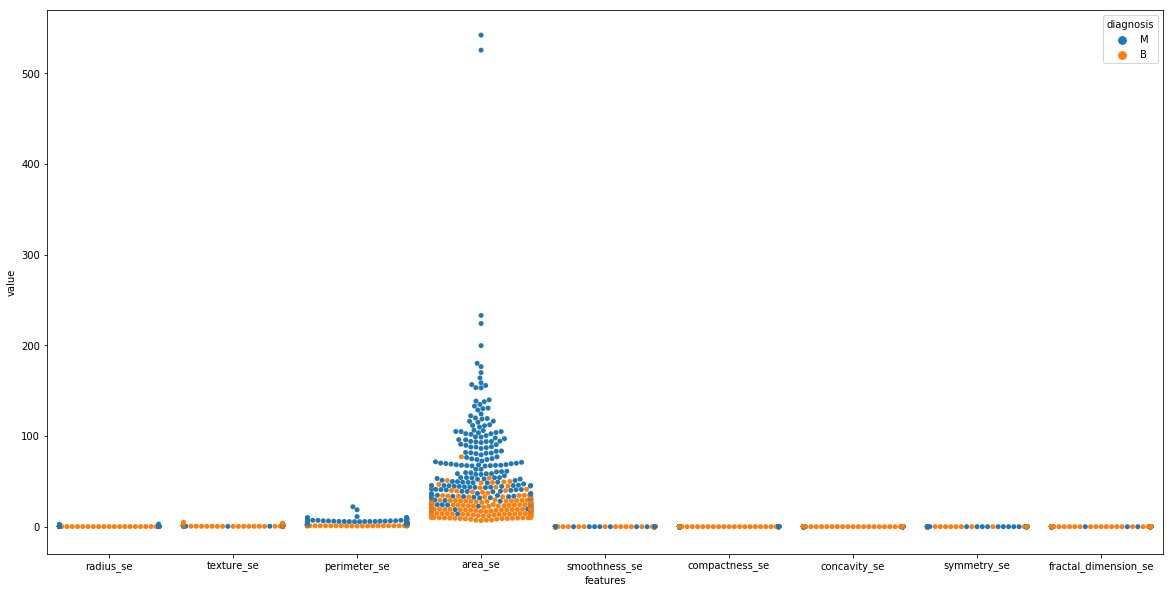

In [18]:
data = pd.concat([df.diagnosis,df[se_features]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data);

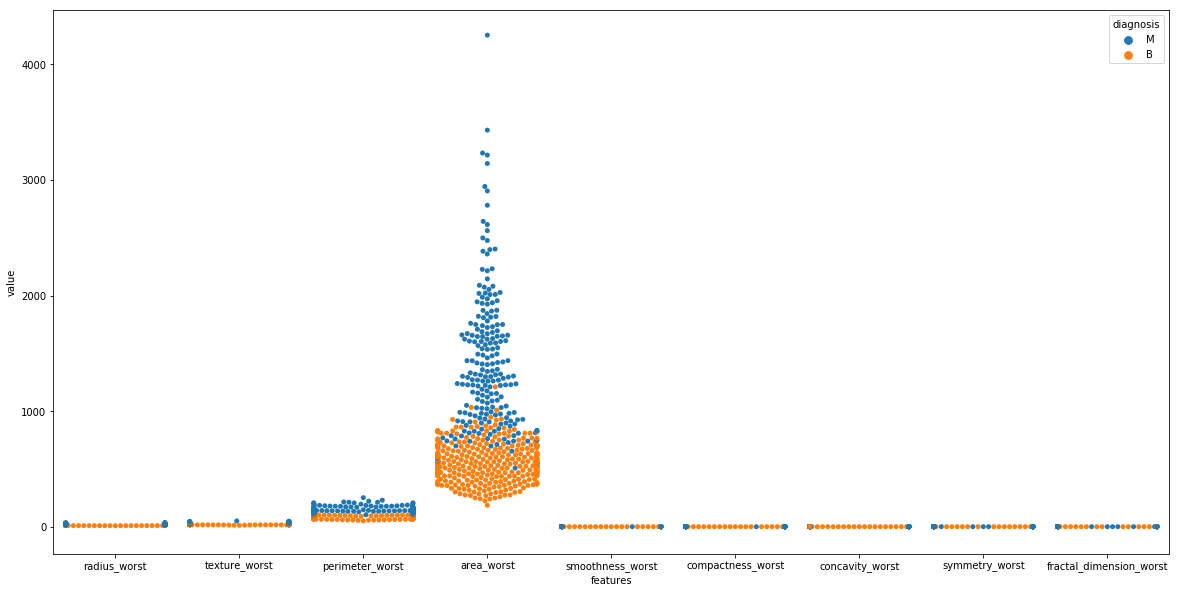

In [19]:
data = pd.concat([df.diagnosis,df[worst_features]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data);

In [20]:
# We have target feature = 'diagnosis' in order to classification so we split this feature

y = df.diagnosis 
x = df.drop('diagnosis', axis = 1)

Number of Benign:  357
Number of Malignant :  212


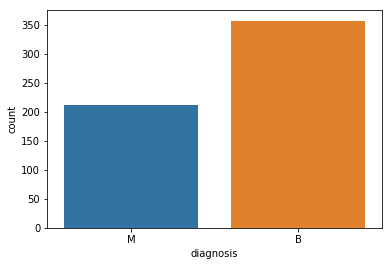

In [21]:
ax = sns.countplot(y,label="Count") 
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [22]:
x.describe()

id  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
count         569.00       569.00        569.00          569.00     569.00           569.00            569.00          569.00               569.00         569.00                  569.00     569.00      569.00        569.00   569.00         569.00          569.00        569.00             569.00       569.00                569.00        569.00         569.00           569.00      569.00            569.00             569.00           569.00                569.00          569.00                   569.00
mean   30,371,831.43        14.13         19.29           91.97     654.89             0.10              0.10            0.09                 0.05           0.18                    0.06       0.41        1.22          2.87    40.34           0.01            0.03          0.03               0.01         0.02                  0.00         16.27          25.68           107.26      880.58              0.13               0.25             0.27                  0.11            0.29                     0.08
std   125,020,585.61         3.52          4.30           24.30     351.91             0.01              0.05            0.08                 0.04           0.03                    0.01       0.28        0.55          2.02    45.49           0.00            0.02          0.03               0.01         0.01                  0.00          4.83           6.15            33.60      569.36              0.02               0.16             0.21                  0.07            0.06                     0.02
min         8,670.00         6.98          9.71           43.79     143.50             0.05              0.02            0.00                 0.00           0.11                    0.05       0.11        0.36          0.76     6.80           0.00            0.00          0.00               0.00         0.01                  0.00          7.93          12.02            50.41      185.20              0.07               0.03             0.00                  0.00            0.16                     0.06
25%       869,218.00        11.70         16.17           75.17     420.30             0.09              0.06            0.03                 0.02           0.16                    0.06       0.23        0.83          1.61    17.85           0.01            0.01          0.02               0.01         0.02                  0.00         13.01          21.08            84.11      515.30              0.12               0.15             0.11                  0.06            0.25                     0.07
50%       906,024.00        13.37         18.84           86.24     551.10             0.10              0.09            0.06                 0.03           0.18                    0.06       0.32        1.11          2.29    24.53           0.01            0.02          0.03               0.01         0.02                  0.00         14.97          25.41            97.66      686.50              0.13               0.21             0.23                  0.10            0.28                     0.08
75%     8,813,129.00        15.78         21.80          104.10     782.70             0.11              0.13            0.13                 0.07           0.20                    0.07       0.48        1.47          3.36    45.19           0.01            0.03          0.04               0.01         0.02                  0.00         18.79          29.72           125.40    1,084.00              0.15               0.34             0.38                  0.16            

In [23]:
y = df.diagnosis.values
x_df = df.drop(["diagnosis"],axis=1)

In [24]:
# X Dataframe should be normalized to avoid dominance among numerical values because it has several features and 
#model success becomes more realistic if numbers are drawn between 0-1.

x = (x_df - np.min(x_df))/(np.max(x_df)-np.min(x_df)).values           # Formula of normalization

### Train and test split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [26]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (455, 31)
x_test:  (114, 31)
y_train:  (455,)
y_test:  (114,)


In [27]:
# Transforming arrays to transpoze in order to avoid getting shape error
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [28]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (31, 455)
x_test:  (31, 114)
y_train:  (455,)
y_test:  (114,)


In [29]:
name_list = ['Logistic Regression', 'Knn(n=8)', 'SVM', 'Naive Bayes','Decision Tree', 'Random Foerest']
pred_score = []    # In order to compare all pred scores

### Logistic Regression with SKLearn

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [31]:
lr.fit(x_train.T,y_train.T)

print("accuracy of logistic regression is:  {}".format(lr.score(x_test.T,y_test.T)))

pred_score.append(lr.score(x_test.T,y_test.T))

accuracy of logistic regression is:  0.9736842105263158


### KNN Algorithm and Visualization

##### We change a lot of things on datasets so again importing original version dataset and using KNN algorithm

In [32]:
df = pd.read_csv("data.csv", delimiter=',')
df.drop(["id","Unnamed: 32"],axis=1,inplace=True)

df.tail(10)   # Controlling last 10 rows

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
559         B        11.51         23.93           74.52     403.50             0.09              0.10            0.11                 0.04           0.14                    0.07       0.24        2.90          1.94    16.97           0.01            0.03          0.06               0.01         0.01                  0.00         12.48          37.16            82.28      474.20              0.13               0.25             0.36                  0.10            0.21                     0.09
560         B        14.05         27.15           91.38     600.40             0.10              0.11            0.04                 0.04           0.15                    0.06       0.36        1.49          2.89    29.84           0.01            0.03          0.02               0.02         0.02                  0.01         15.30          33.17           100.20      706.70              0.12               0.23             0.13                  0.10            0.23                     0.08
561         B        11.20         29.37           70.67     386.00             0.07              0.04            0.00                 0.00           0.11                    0.06       0.31        3.90          2.04    22.81           0.01            0.01          0.00               0.00         0.02                  0.00         11.92          38.30            75.19      439.60              0.09               0.05             0.00                  0.00            0.16                     0.06
562         M        15.22         30.62          103.40     716.90             0.10              0.21            0.26                 0.09           0.21                    0.07       0.26        1.21          2.36    22.65           0.00            0.05          0.07               0.02         0.02                  0.01         17.52          42.79           128.70      915.00              0.14               0.79             1.17                  0.24            0.41                     0.14
563         M        20.92         25.09          143.00   1,347.00             0.11              0.22            0.32                 0.15           0.21                    0.07       0.96        1.03          8.76   118.80           0.01            0.04          0.08               0.03         0.02                  0.01         24.29          29.41           179.10    1,819.00              0.14               0.42             0.66                  0.25            0.29                     0.10
564         M        21.56         22.39          142.00   1,479.00             0.11              0.12            0.24                 0.14           0.17                    0.06       1.18        1.26          7.67   158.70           0.01            0.03          0.05               0.02         0.01                  0.00         25.45          26.40           166.10    2,027.00              0.14               0.21             0.41                  0.22            0.21                     0.07
565         M        20.13         28.25          131.20   1,261.00             0.10              0.10            0.14                 0.10           0.18                    0.06       0.77        2.46          5.20    99.04           0.01            0.02          0.04               0.02         0.02                  0.00         23.69          38.25           155.00    1,731.00              0.12               0.19             0.32                  0.16            0.26                     0.07
566         

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [34]:
df.describe()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
count       569.00        569.00          569.00     569.00           569.00            569.00          569.00               569.00         569.00                  569.00     569.00      569.00        569.00   569.00         569.00          569.00        569.00             569.00       569.00                569.00        569.00         569.00           569.00      569.00            569.00             569.00           569.00                569.00          569.00                   569.00
mean         14.13         19.29           91.97     654.89             0.10              0.10            0.09                 0.05           0.18                    0.06       0.41        1.22          2.87    40.34           0.01            0.03          0.03               0.01         0.02                  0.00         16.27          25.68           107.26      880.58              0.13               0.25             0.27                  0.11            0.29                     0.08
std           3.52          4.30           24.30     351.91             0.01              0.05            0.08                 0.04           0.03                    0.01       0.28        0.55          2.02    45.49           0.00            0.02          0.03               0.01         0.01                  0.00          4.83           6.15            33.60      569.36              0.02               0.16             0.21                  0.07            0.06                     0.02
min           6.98          9.71           43.79     143.50             0.05              0.02            0.00                 0.00           0.11                    0.05       0.11        0.36          0.76     6.80           0.00            0.00          0.00               0.00         0.01                  0.00          7.93          12.02            50.41      185.20              0.07               0.03             0.00                  0.00            0.16                     0.06
25%          11.70         16.17           75.17     420.30             0.09              0.06            0.03                 0.02           0.16                    0.06       0.23        0.83          1.61    17.85           0.01            0.01          0.02               0.01         0.02                  0.00         13.01          21.08            84.11      515.30              0.12               0.15             0.11                  0.06            0.25                     0.07
50%          13.37         18.84           86.24     551.10             0.10              0.09            0.06                 0.03           0.18                    0.06       0.32        1.11          2.29    24.53           0.01            0.02          0.03               0.01         0.02                  0.00         14.97          25.41            97.66      686.50              0.13               0.21             0.23                  0.10            0.28                     0.08
75%          15.78         21.80          104.10     782.70             0.11              0.13            0.13                 0.07           0.20                    0.07       0.48        1.47          3.36    45.19           0.01            0.03          0.04               0.01         0.02                  0.00         18.79          29.72           125.40    1,084.00              0.15               0.34             0.38                  0.16            0.32                     0.09
max          28.11         39.28          188.50   2,501.00             0.16   

In [35]:
# Target Feature is diagnosis wthin M and B class

M = df[df.diagnosis == "M"]
B = df[df.diagnosis == "B"]

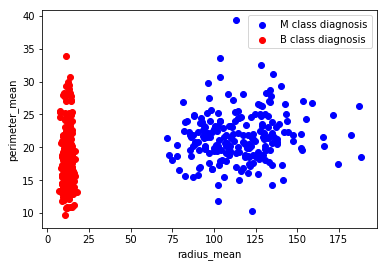

In [36]:
plt.scatter(M.perimeter_mean,M.texture_mean,color="blue",label="M class diagnosis")
plt.scatter(B.radius_mean,B.texture_mean,color="red",label="B class diagnosis")

plt.xlabel("radius_mean")
plt.ylabel("perimeter_mean")
plt.legend()

plt.show()

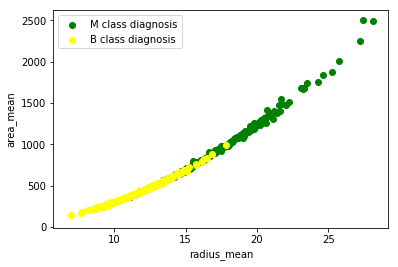

In [37]:
plt.scatter(M.radius_mean,M.area_mean,color="green",label="M class diagnosis")
plt.scatter(B.radius_mean,B.area_mean,color="yellow",label="B class diagnosis")

plt.xlabel("radius_mean")
plt.ylabel("area_mean")
plt.legend()

plt.show()

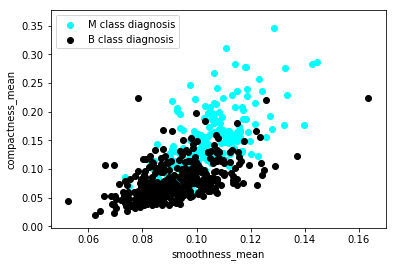

In [38]:
plt.scatter(M.smoothness_mean,M.compactness_mean,color="cyan",label="M class diagnosis")
plt.scatter(B.smoothness_mean,B.compactness_mean,color="black",label="B class diagnosis")

plt.xlabel("smoothness_mean")
plt.ylabel("compactness_mean")
plt.legend()

plt.show()

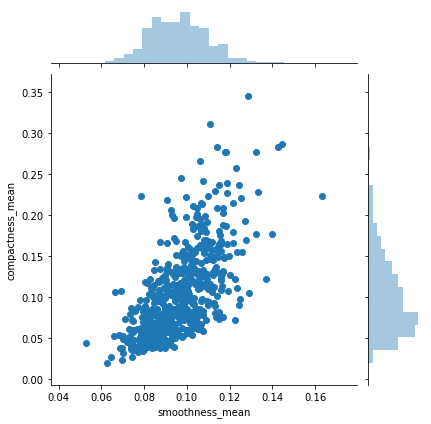

In [39]:
sns.jointplot(x='smoothness_mean',y='compactness_mean',data=df,kind='scatter');

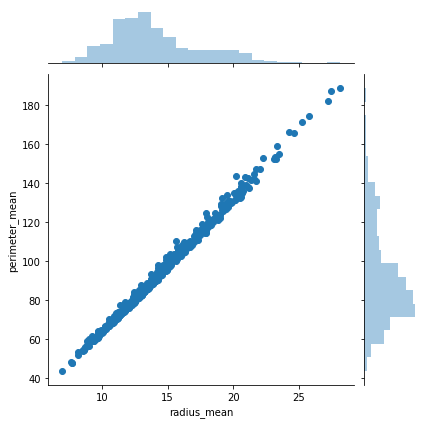

In [40]:
sns.jointplot(x='radius_mean',y='perimeter_mean',data=df,kind='scatter');

In [41]:
df.corr()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
radius_mean                     1.00          0.32            1.00       0.99             0.17              0.51            0.68                 0.82           0.15                   -0.31       0.68       -0.10          0.67     0.74          -0.22            0.21          0.19               0.38        -0.10                 -0.04          0.97           0.30             0.97        0.94              0.12               0.41             0.53                  0.74            0.16                     0.01
texture_mean                    0.32          1.00            0.33       0.32            -0.02              0.24            0.30                 0.29           0.07                   -0.08       0.28        0.39          0.28     0.26           0.01            0.19          0.14               0.16         0.01                  0.05          0.35           0.91             0.36        0.34              0.08               0.28             0.30                  0.30            0.11                     0.12
perimeter_mean                  1.00          0.33            1.00       0.99             0.21              0.56            0.72                 0.85           0.18                   -0.26       0.69       -0.09          0.69     0.74          -0.20            0.25          0.23               0.41        -0.08                 -0.01          0.97           0.30             0.97        0.94              0.15               0.46             0.56                  0.77            0.19                     0.05
area_mean                       0.99          0.32            0.99       1.00             0.18              0.50            0.69                 0.82           0.15                   -0.28       0.73       -0.07          0.73     0.80          -0.17            0.21          0.21               0.37        -0.07                 -0.02          0.96           0.29             0.96        0.96              0.12               0.39             0.51                  0.72            0.14                     0.00
smoothness_mean                 0.17         -0.02            0.21       0.18             1.00              0.66            0.52                 0.55           0.56                    0.58       0.30        0.07          0.30     0.25           0.33            0.32          0.25               0.38         0.20                  0.28          0.21           0.04             0.24        0.21              0.81               0.47             0.43                  0.50            0.39                     0.50
compactness_mean                0.51          0.24            0.56       0.50             0.66              1.00            0.88                 0.83           0.60                    0.57       0.50        0.05          0.55     0.46           0.14            0.74          0.57               0.64         0.23                  0.51          0.54           0.25             0.59        0.51              0.57               0.87             0.82                  0.82            0.51                     0.69
concavity_mean                  0.68          0.30            0.72       0.69             0.52              0.88            1.00                 0.92           0.50                    0.34       0.63        0.08          0.66     0.62           0.10            0.67          0.69               0.68         0.18                  0.45          0.69           0.30             0.73        0.68              0.45               0.75             0.88                 

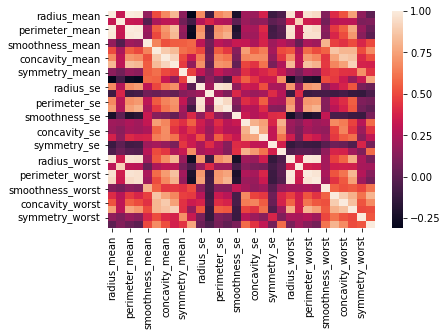

In [42]:
sns.heatmap(df.corr());

In [43]:
# We assign 1 value if diagnosis is M and we assing 0 value if diagnosis is B  

df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]

y = df.diagnosis.values
x_df = df.drop(["diagnosis"],axis=1)

In [44]:
# normalization 
x = (x_df - np.min(x_df))/(np.max(x_df)-np.min(x_df))

In [45]:
# Train and test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [46]:
# Using KNN Model

from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 5  # as an example

knn = KNeighborsClassifier(n_neighbors = n_neighbors) # n_neighbors = k

knn.fit(x_train,y_train)

prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(n_neighbors, knn.score(x_test,y_test)))

 5 nn score: 0.9590643274853801 


In [47]:
# Using KNN Model

n_neighbors = 8  # as an example

knn = KNeighborsClassifier(n_neighbors = n_neighbors) # n_neighbors = k

knn.fit(x_train,y_train)

prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(n_neighbors, knn.score(x_test,y_test)))

pred_score.append(knn.score(x_test,y_test))

 8 nn score: 0.9649122807017544 


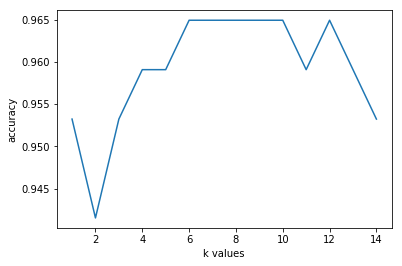

In [48]:
# Finding optimal  k value

score_list = []

for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

As you have seen, optimal k values to 6 from 12.

## Support Vector Machines

In [49]:
from sklearn.svm import SVC
 
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
 
print("accuracy of svm value is: ",svm.score(x_test,y_test))

pred_score.append(svm.score(x_test,y_test))

accuracy of svm value is:  0.9532163742690059


## Naive Bayes Classification

In [50]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
 
print("accuracy of naive bayes : ",nb.score(x_test,y_test))

pred_score.append(nb.score(x_test,y_test))

accuracy of naive bayes :  0.935672514619883


## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("accuracy of decision tree: ", dt.score(x_test,y_test))

pred_score.append(dt.score(x_test,y_test))

accuracy of decision tree:  0.9298245614035088


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 100  # as an example number of trees

rf = RandomForestClassifier(n_estimators = n_estimators,random_state = 1)

rf.fit(x_train,y_train)

print("accuracy of random forest (100): ",rf.score(x_test,y_test))

pred_score.append(rf.score(x_test,y_test))

accuracy of random forest (100):  0.9532163742690059


## Evaluating Confusion Matrix

##### As an example Random Forests predictions values

In [53]:
y_pred = rf.predict(x_test)
y_true = y_test

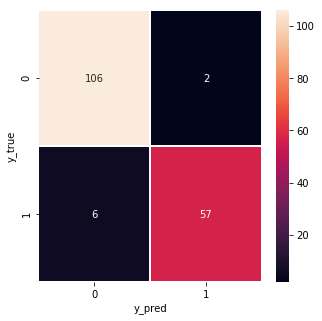

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# visualization with heatmap
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,fmt = ".0f",ax = ax)

plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

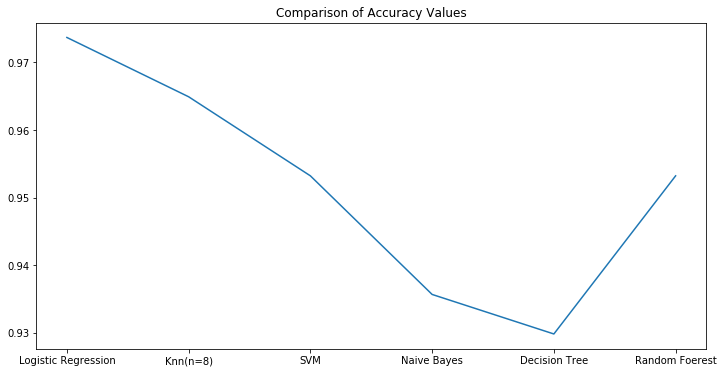

In [55]:
accuracy = pd.DataFrame({'algorithmas' : name_list, 'accuracy_value': pred_score})

plt.figure(figsize=(12,6))

plt.plot(accuracy.algorithmas,accuracy.accuracy_value)

plt.title("Comparison of Accuracy Values")

plt.show()

#### We found that Logistic Rgression & KNN provides maximum accuracy while Decision Trees and Naive Bayes provides least accuracy. 